In [1]:
import pandas as pd
import numpy as np
import yaml
import pickle
from sklearn import tree
import shap
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
shap.initjs()
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import math
import warnings
warnings.filterwarnings('ignore')
import plotly
import plotly.io as pio
import plotly.express as px
from sklearn import metrics
from sklearn.metrics import auc, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import imblearn
from imblearn.over_sampling import SMOTE

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


In [2]:
df = pd.read_excel('Adult_Income.xlsx', index_col=0)
df.head(55)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [3]:
print(df.value_counts().sum())
print('\n')
df['occupation'].value_counts()

32561




 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

## There are so many arbitary / random values which does not make any sense like "?", "12th" etc etc. Need to check those and replace with meaningful values ##

## Using the mode function/values count method to check and impute them appropriate values ##

In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

In [5]:
## 1st - Age Column ##
df['age'].isnull().sum()

0

In [6]:
print(df['age'].unique())
print('\n')
print(df['age'].nunique())
print('\n')
print(df['age'].value_counts().sum())

## Age column does not have any arbitary values that is irrelevant , hence changes needed for this column ##

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]


73


32561


In [7]:
## 2nd - Workclass column ##
print(df['workclass'].unique())
print('\n')
print(df['workclass'].nunique())
print('\n')
print(df['workclass'].value_counts().sum())
print('\n')
print(df['workclass'].mode())
print('\n')
print(df['workclass'].value_counts())

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


9


32561


0     Private
dtype: object


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


In [8]:
## 3rd Column - fnlwgt ##
print(df['fnlwgt'].unique())
print('\n')
print(df['fnlwgt'].nunique())
print('\n')
print(df['fnlwgt'].value_counts().sum())
print('\n')
print(df['fnlwgt'].mode())
print('\n')
print(df['fnlwgt'].value_counts())

[ 77516  83311 215646 ...  34066  84661 257302]


21648


32561


0    123011
1    164190
2    203488
dtype: int64


203488    13
123011    13
164190    13
148995    12
113364    12
          ..
218551     1
201204     1
362999     1
162297     1
145522     1
Name: fnlwgt, Length: 21648, dtype: int64


In [9]:
## 4th Column - education
print(df['education'].unique())
print('\n')
print(df['education'].nunique())
print('\n')
print(df['education'].value_counts().sum())
print('\n')
print(df['education'].mode())
print('\n')
print(df['education'].value_counts())

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


16


32561


0     HS-grad
dtype: object


 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64


In [10]:
## 5th Column - education-num  ##
print(df['education-num'].unique())
print('\n')
print(df['education-num'].nunique())
print('\n')
print(df['education-num'].value_counts().sum())
print('\n')
print(df['education-num'].mode())
print('\n')
print(df['education-num'].value_counts())

[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


16


32561


0    9
dtype: int64


9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64


In [11]:
## 6th Column - marital-status  ##
print(df['marital-status'].unique())
print('\n')
print(df['marital-status'].nunique())
print('\n')
print(df['marital-status'].value_counts().sum())
print('\n')
print(df['marital-status'].mode())
print('\n')
print(df['marital-status'].value_counts())

[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


7


32561


0     Married-civ-spouse
dtype: object


 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64


In [12]:
## 7th Column - occupation  ##
print(df['occupation'].unique())
print('\n')
print(df['occupation'].nunique())
print('\n')
print(df['occupation'].value_counts().sum())
print('\n')
print(df['occupation'].mode())
print('\n')
print(df['occupation'].value_counts())

[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']


15


32561


0     Prof-specialty
dtype: object


 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64


In [13]:
## 8th Column - relationship  ##
print(df['relationship'].unique())
print('\n')
print(df['relationship'].nunique())
print('\n')
print(df['relationship'].value_counts().sum())
print('\n')
print(df['relationship'].mode())
print('\n')
print(df['relationship'].value_counts())


[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']


6


32561


0     Husband
dtype: object


 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64


In [14]:
## 9th Column - race  ##
print(df['race'].unique())
print('\n')
print(df['race'].nunique())
print('\n')
print(df['race'].value_counts().sum())
print('\n')
print(df['race'].mode())
print('\n')
print(df['race'].value_counts())


[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']


5


32561


0     White
dtype: object


 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64


In [15]:
## 10th Column - sex  ##
print(df['sex'].unique())
print('\n')
print(df['sex'].nunique())
print('\n')
print(df['sex'].value_counts().sum())
print('\n')
print(df['sex'].mode())
print('\n')
print(df['sex'].value_counts())

[' Male' ' Female']


2


32561


0     Male
dtype: object


 Male      21790
 Female    10771
Name: sex, dtype: int64


In [16]:
## 11th Column - capital-gain  ##
print(df['capital-gain'].unique())
print('\n')
print(df['capital-gain'].nunique())
print('\n')
print(df['capital-gain'].value_counts().sum())
print('\n')
print(df['capital-gain'].mode())
print('\n')
print(df['capital-gain'].value_counts())

[ 2174     0 14084  5178  5013  2407 14344 15024  7688 34095  4064  4386
  7298  1409  3674  1055  3464  2050  2176   594 20051  6849  4101  1111
  8614  3411  2597 25236  4650  9386  2463  3103 10605  2964  3325  2580
  3471  4865 99999  6514  1471  2329  2105  2885 25124 10520  2202  2961
 27828  6767  2228  1506 13550  2635  5556  4787  3781  3137  3818  3942
   914   401  2829  2977  4934  2062  2354  5455 15020  1424  3273 22040
  4416  3908 10566   991  4931  1086  7430  6497   114  7896  2346  3418
  3432  2907  1151  2414  2290 15831 41310  4508  2538  3456  6418  1848
  3887  5721  9562  1455  2036  1831 11678  2936  2993  7443  6360  1797
  1173  4687  6723  2009  6097  2653  1639 18481  7978  2387  5060]


119


32561


0    0
dtype: int64


0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1639         1
5060         1
6097         1
1455         1
7978         1
Name: capital-gain, Length: 119, dtype: int64


In [17]:
## 12th Column - capital-loss  ##
print(df['capital-loss'].unique())
print('\n')
print(df['capital-loss'].nunique())
print('\n')
print(df['capital-loss'].value_counts().sum())
print('\n')
print(df['capital-loss'].mode())
print('\n')
print(df['capital-loss'].value_counts())

[   0 2042 1408 1902 1573 1887 1719 1762 1564 2179 1816 1980 1977 1876
 1340 2206 1741 1485 2339 2415 1380 1721 2051 2377 1669 2352 1672  653
 2392 1504 2001 1590 1651 1628 1848 1740 2002 1579 2258 1602  419 2547
 2174 2205 1726 2444 1138 2238  625  213 1539  880 1668 1092 1594 3004
 2231 1844  810 2824 2559 2057 1974  974 2149 1825 1735 1258 2129 2603
 2282  323 4356 2246 1617 1648 2489 3770 1755 3683 2267 2080 2457  155
 3900 2201 1944 2467 2163 2754 2472 1411]


92


32561


0    0
dtype: int64


0       31042
1902      202
1977      168
1887      159
1485       51
        ...  
2467        1
1539        1
155         1
2282        1
1411        1
Name: capital-loss, Length: 92, dtype: int64


In [18]:
## 13th Column - hours-per-week  ##
print(df['hours-per-week'].unique())
print('\n')
print(df['hours-per-week'].nunique())
print('\n')
print(df['hours-per-week'].value_counts().sum())
print('\n')
print(df['hours-per-week'].mode())
print('\n')
print(df['hours-per-week'].value_counts())

[40 13 16 45 50 80 30 35 60 20 52 44 15 25 38 43 55 48 58 32 70  2 22 56
 41 28 36 24 46 42 12 65  1 10 34 75 98 33 54  8  6 64 19 18 72  5  9 47
 37 21 26 14  4 59  7 99 53 39 62 57 78 90 66 11 49 84  3 17 68 27 85 31
 51 77 63 23 87 88 73 89 97 94 29 96 67 82 86 91 81 76 92 61 74 95]


94


32561


0    40
dtype: int64


40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
92        1
74        1
94        1
82        1
87        1
Name: hours-per-week, Length: 94, dtype: int64


In [19]:
## 14th Column - native-country  ##
print(df['native-country'].unique())
print('\n')
print(df['native-country'].nunique())
print('\n')
print(df['native-country'].value_counts().sum())
print('\n')
print(df['native-country'].mode())
print('\n')
print(df['native-country'].value_counts())

[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']


42


32561


0     United-States
dtype: object


 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                      

In [20]:
## 15th Column - class  ##
print(df['class'].unique())
print('\n')
print(df['class'].nunique())
print('\n')
print(df['class'].value_counts().sum())
print('\n')
print(df['class'].mode())
print('\n')
print(df['class'].value_counts())

[' <=50K' ' >50K']


2


32561


0     <=50K
dtype: object


 <=50K    24720
 >50K      7841
Name: class, dtype: int64


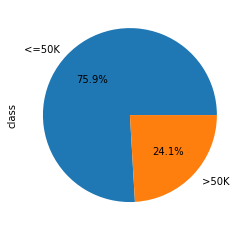

In [21]:
## Checking the class/dependent column && counts of label categories##
df['class'].value_counts().plot.pie(autopct='%1.1f%%')

## Above plot shows almost 76% people are earning less than equal to 50K & 24% people earning greater than 50K ##
## The dataset doesn't have any null values, but it has junk values like '?' which needs to be preprocessed ##

## The dataset is seemed to be unbalanced, as the target variable 'class' contains 76% values have income less than 50K and 24% values have income more than 50K ##

## EDA ##

In [22]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [23]:
df = df.rename(columns={'class':'income'})

## Univariate Analysis ##

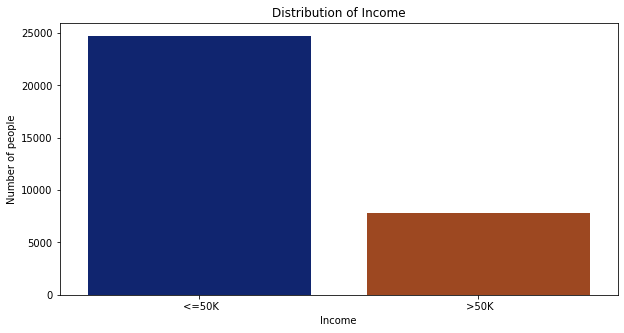

In [24]:
## Bar-Plot for the income ##
income = df['income'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(income.index, income.values, palette='dark')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Number of people')
plt.tick_params(labelsize=10)
plt.show()

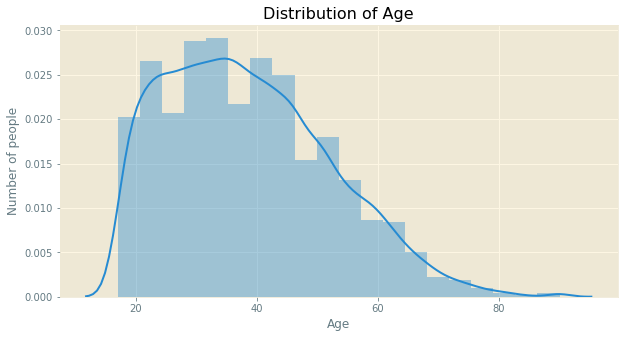

In [25]:
# Creating a distribution plot for 'Age'
age = df['age'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('Solarize_Light2')
sns.distplot(df['age'], bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.tick_params(labelsize=10)
plt.show()

In [26]:
def draw_distplot(column, title = ""):
    
    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(111)
    ax.set_facecolor((0,0,0.10))
    sns.distplot(column)

    mean_value = column.mean()
    plt.axvline(mean_value, c='red', linewidth=1.5, label="mean")

    median_value = column.median()
    plt.axvline(median_value, c='blue', linewidth=1.5, label="median")
    plt.legend(loc='upper right', prop={'size': 20})
    plt.title(title)
    plt.show()

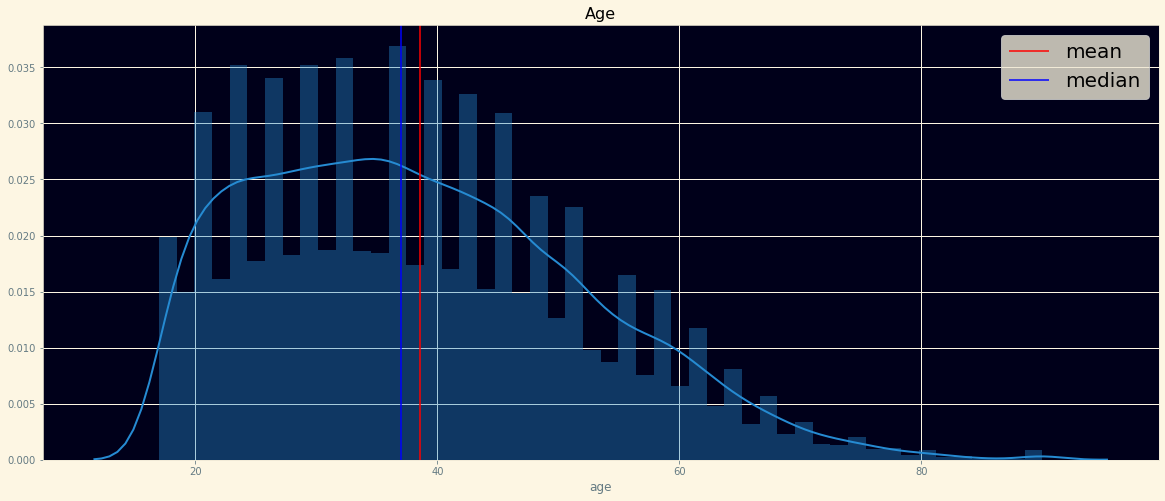

In [27]:
draw_distplot(column=df['age'], title="Age")

In [49]:
## Above plot we can see that precise median age for >50K income is 44 yrs & precise median age for <=50K income 34 yrs

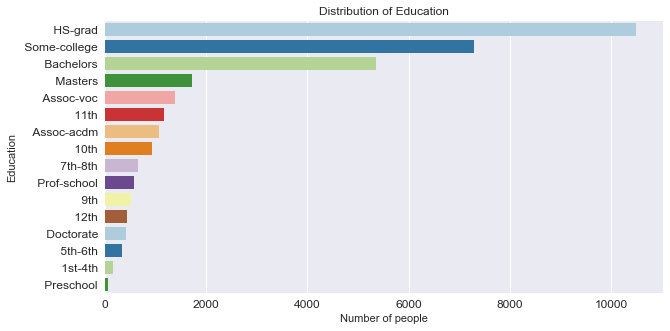

In [28]:
# Creating a barplot for 'Education'
edu = df['education'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot(edu.values, edu.index, palette='Paired')
plt.title('Distribution of Education')
plt.xlabel('Number of people')
plt.ylabel('Education')
plt.tick_params(labelsize=12)
plt.show()

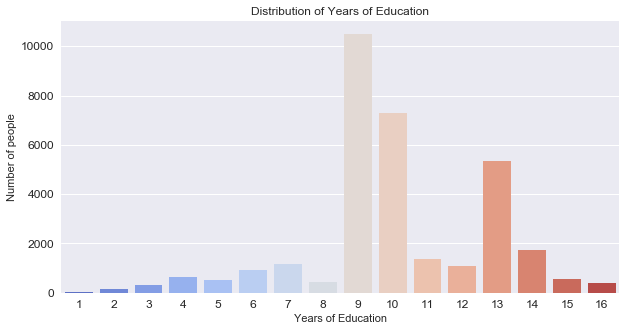

In [29]:
# Creating a barplot for 'Years of Education'
edu_num = df['education-num'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot(edu_num.index, edu_num.values, palette='coolwarm')
plt.title('Distribution of Years of Education')
plt.xlabel('Years of Education')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.show()

In [30]:
def draw_distplot(column, title = ""):
    
    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(111)
    ax.set_facecolor((0,0,0.10))
    sns.distplot(column)

    mean_value = column.mean()
    plt.axvline(mean_value, c='red', linewidth=1.5, label="mean")

    median_value = column.median()
    plt.axvline(median_value, c='blue', linewidth=1.5, label="median")
    plt.legend(loc='upper right', prop={'size': 20})
    plt.title(title)
    plt.show()

In [32]:
def draw_countplot(countplot_x, countplot_hue, countplot_data, figsize_a=20, figsize_b=10, xticks_rotation=45):
    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(111)
    ax.set_facecolor((0,0,0.10))
    plt.xticks(rotation = xticks_rotation)
    plt.rc('xtick',labelsize=8)
    sns.countplot(x = countplot_x, hue = countplot_hue, data = countplot_data)
    plt.legend(prop={'size': 30})
    plt.show()

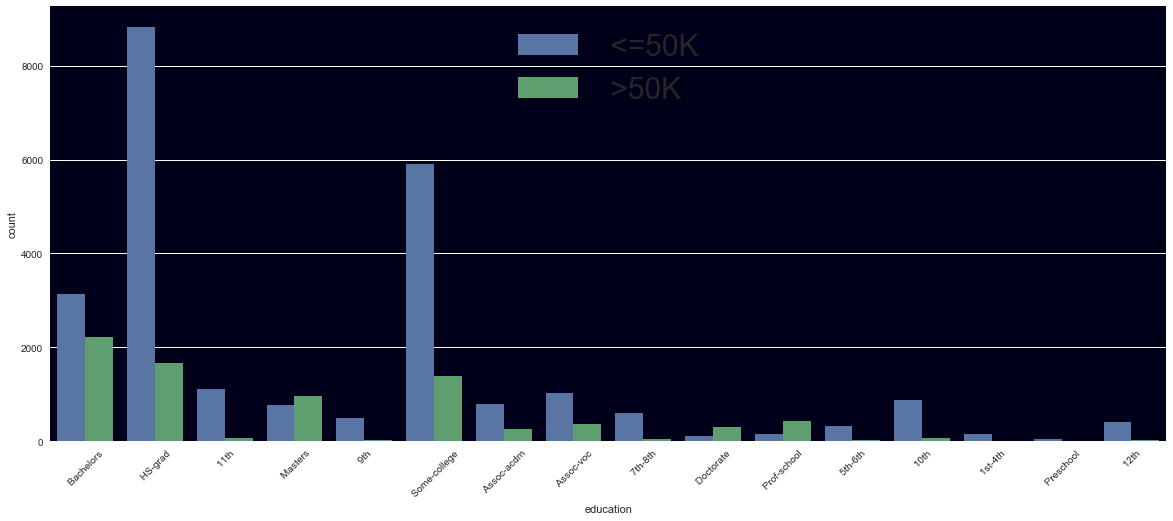

In [33]:
draw_countplot(countplot_x='education', countplot_hue='income', countplot_data=df)

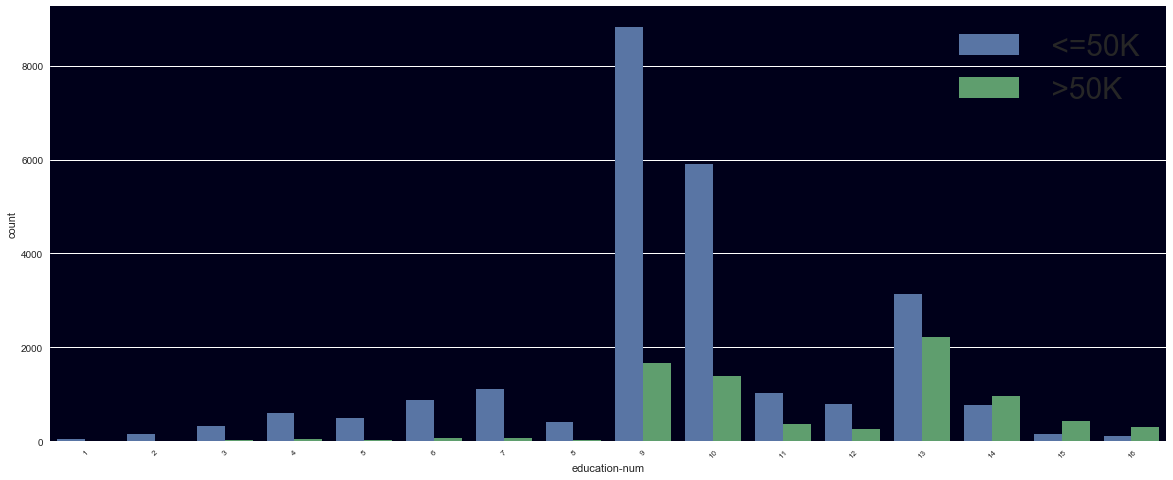

In [34]:
draw_countplot(countplot_x='education-num', countplot_hue='income', countplot_data=df)

In [35]:
education_var = df['education'].unique()
for edu_var in education_var:
    print("For {}, the Education Number is {}"
          .format(edu_var, df[df['education'] == edu_var]['education-num'].unique()))

For  Bachelors, the Education Number is [13]
For  HS-grad, the Education Number is [9]
For  11th, the Education Number is [7]
For  Masters, the Education Number is [14]
For  9th, the Education Number is [5]
For  Some-college, the Education Number is [10]
For  Assoc-acdm, the Education Number is [12]
For  Assoc-voc, the Education Number is [11]
For  7th-8th, the Education Number is [4]
For  Doctorate, the Education Number is [16]
For  Prof-school, the Education Number is [15]
For  5th-6th, the Education Number is [3]
For  10th, the Education Number is [6]
For  1st-4th, the Education Number is [2]
For  Preschool, the Education Number is [1]
For  12th, the Education Number is [8]


In [69]:
## Seeing above, Education Num and Education Name are just the same, so any of them column can be dropped ##

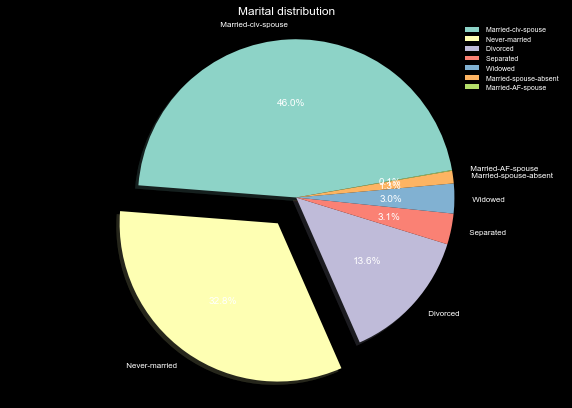

In [36]:
# Creating a pie chart for 'Marital status'
marital = df['marital-status'].value_counts()

plt.style.use('dark_background')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution')
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

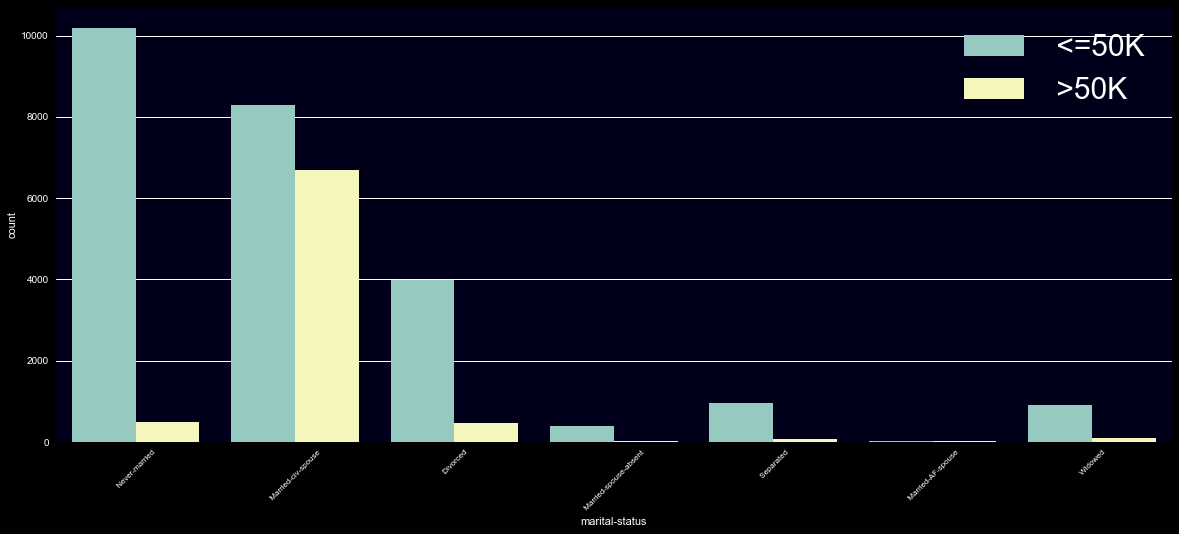

In [37]:
draw_countplot(countplot_x='marital-status', countplot_hue='income', countplot_data=df)

In [76]:
## Above shows the Married-civ spouse category has larger weights in terms of scoring 1 value i.e >=50K ##

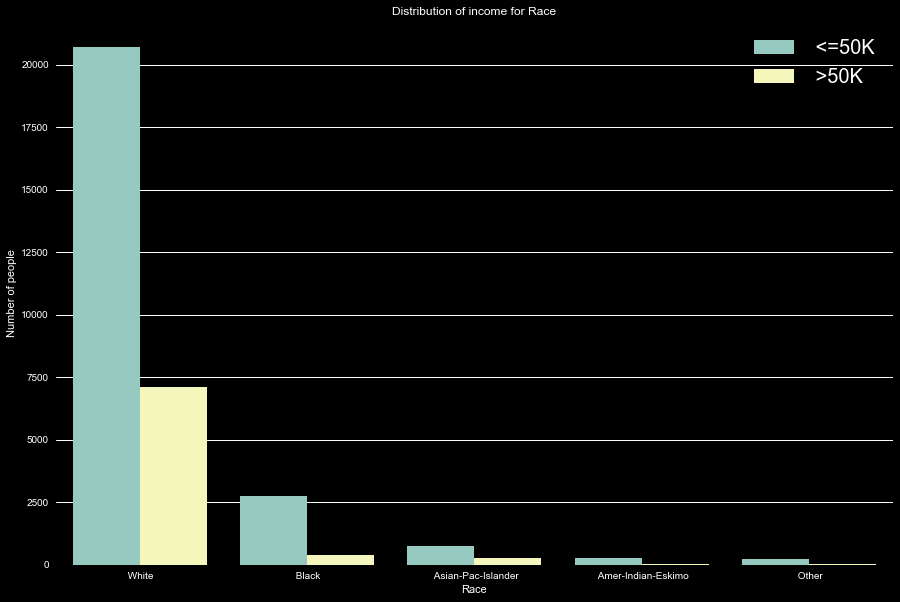

In [38]:
# Creating a countplot of income for ' Race'
plt.style.use('dark_background')
plt.figure(figsize=(15, 10))
sns.countplot(df['race'], hue=df['income'])
plt.title('Distribution of income for Race')
plt.xlabel('Race')
plt.ylabel('Number of people')
plt.tick_params(labelsize=10)
plt.legend(loc=1, prop={'size': 20})
plt.show()

In [79]:
## Seeing the above, The majority no of people in this dataset are from White race.
## Combining Number of White & Number of Black into one variable to have more importance ##

In [39]:
df['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [40]:
df["race"] = df["race"].apply(lambda x: x.replace("Asian-Pac-Islander", "Other"))
df["race"] = df["race"].apply(lambda x: x.replace("Amer-Indian-Eskimo", "Other"))
df["race"] = df["race"].apply(lambda x: x.replace("Other", "Other"))

In [41]:
df['race'].value_counts()

 White    27816
 Black     3124
 Other     1621
Name: race, dtype: int64

sex      income
 Female   <=50K     9592
          >50K      1179
 Male     <=50K    15128
          >50K      6662
Name: income, dtype: int64
-------------------->


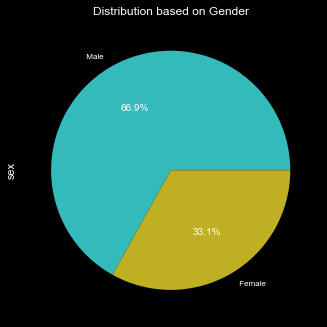

<Figure size 360x720 with 0 Axes>

-------------------->


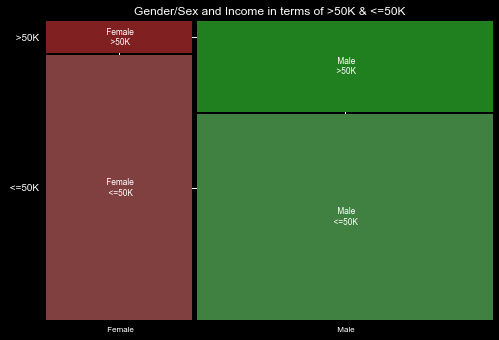

In [42]:
## Creating the pie plot check for Sex column ##
from statsmodels.graphics.mosaicplot import mosaic
income_by_sex = pd.DataFrame({'sex': df['sex'], 'income': df['income']})
income_data = income_by_sex.income.groupby([income_by_sex.sex,  income_by_sex.income]).size()
plt.title('Distribution based on Gender')
print(income_data)
print('-------------------->')
df['sex'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#33bbbb','#beb022'])
plt.figure(figsize=(5,10))
plt.show()
print('-------------------->')
mosaic(income_data, gap=0.01, title = "Gender/Sex and Income in terms of >50K & <=50K")
plt.show()

In [84]:
## Seeing above we can that More % of Male are earning Incomemore than 50K than Females.

In [85]:
## Exploring columns - CAPITAL-GAIN and CAPITAL-LOSS ##

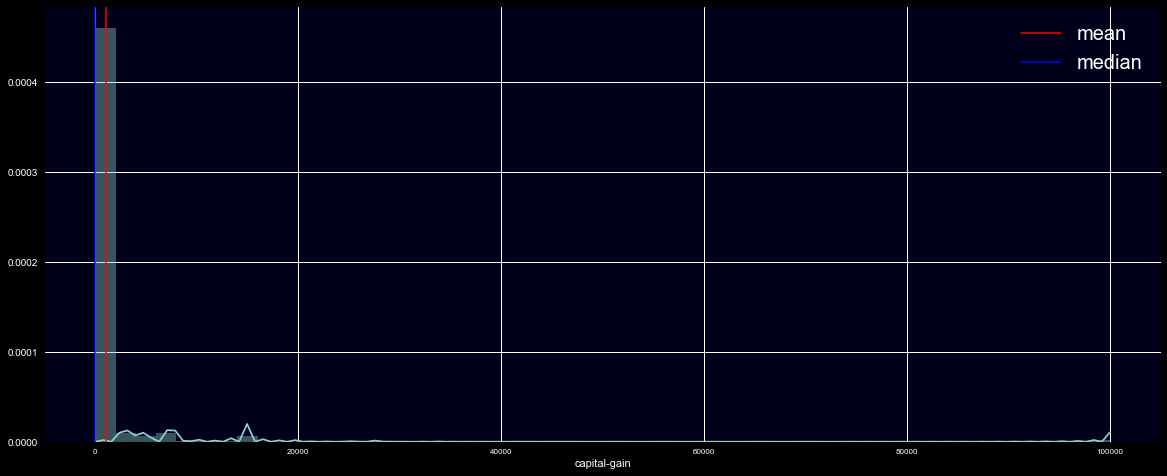

In [43]:
draw_distplot(column=df['capital-gain'])

In [44]:
df['capital-gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1639         1
5060         1
6097         1
1455         1
7978         1
Name: capital-gain, Length: 119, dtype: int64

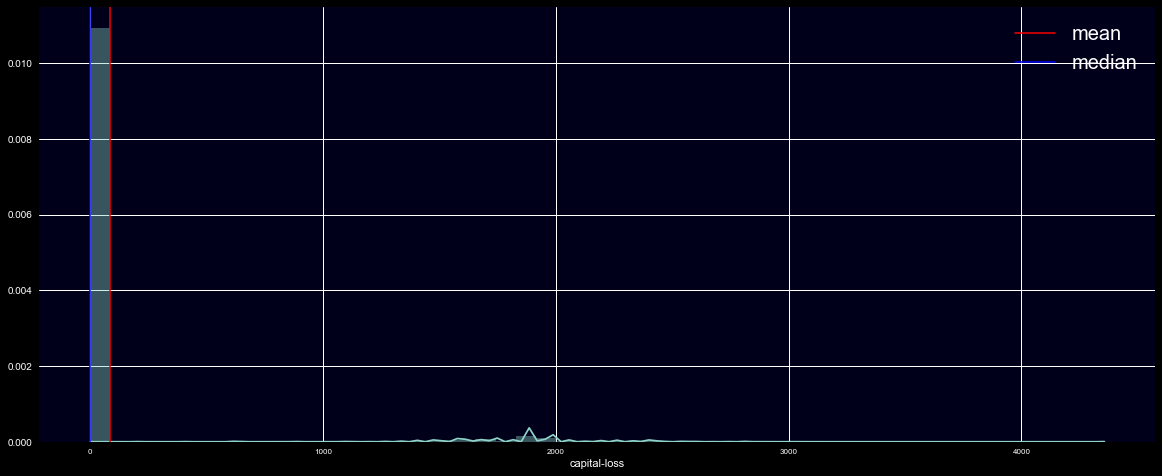

In [45]:
draw_distplot(column=df['capital-loss'])

In [46]:
df['capital-loss'].value_counts()

0       31042
1902      202
1977      168
1887      159
1485       51
        ...  
2467        1
1539        1
155         1
2282        1
1411        1
Name: capital-loss, Length: 92, dtype: int64

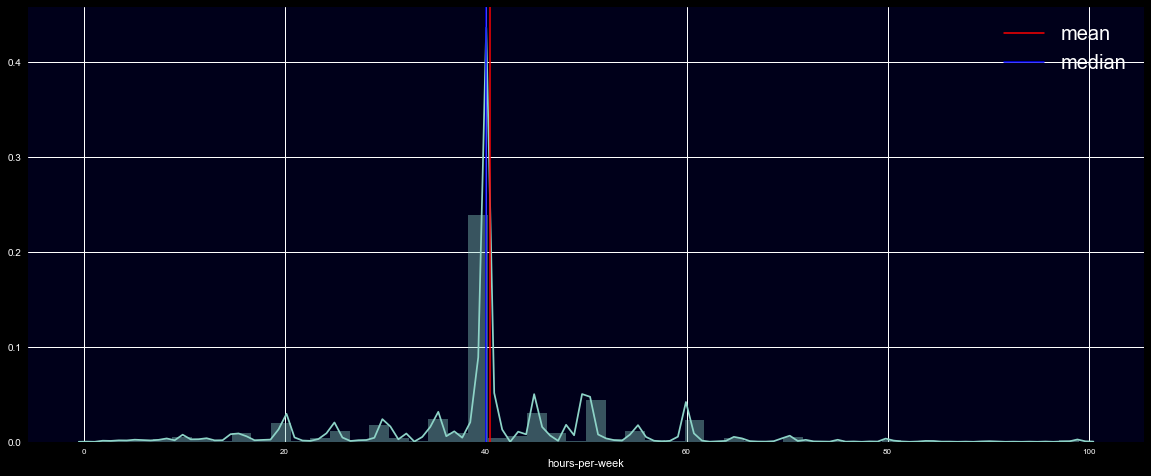

In [47]:
## Exploring HOURS-PER-WEEKk ##
draw_distplot(column=df['hours-per-week'])

In [91]:
## Seeing above we can see that though dataset is varying from 0 - 100 but the majority people are work on average of 40h/week ##

Text(0.5, 1.0, 'Total No. of People from each Country')

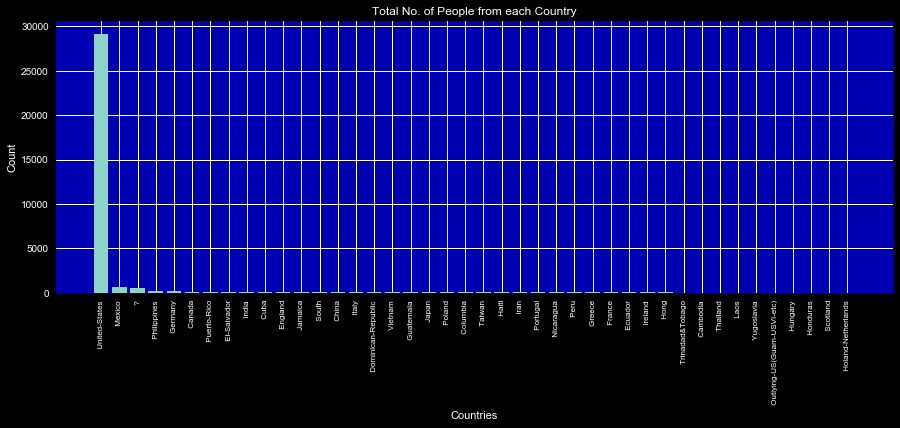

In [48]:
## Exploring column - NATIVE-COUNTRY and see how many people are from which COUNTRY showing significant importance towards income/target ##
Country_Count = df['native-country'].value_counts()
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.set_facecolor((0,0,0.7))
plt.bar(Country_Count.index, Country_Count.values)
plt.xticks(rotation = 90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Total No. of People from each Country')

In [49]:
df['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [94]:
## seeing above , we can see that a junk/error value is there within Native-Country ##
## Also the majority people are from US, we can combine rest of countries into another var called Other countries ##

In [95]:
## We can either delete the "?" values from multiple cols or either replace them with Mode values ##
## As we know that we have "?" in 3 columns i.e ['workclass','occupation','native-country'] ##
## So we are goin to replace these junk value "?" with mode value ##


In [50]:
df['native-country'] = df['native-country'].str.strip().map(lambda x: np.nan if x=="?" else x)
df['workclass'] = df['workclass'].str.strip().map(lambda x: np.nan if x=="?" else x)
df['occupation'] = df['occupation'].str.strip().map(lambda x: np.nan if x=="?" else x)
# Checking null values
round((df.isnull().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

age                0.0 %
workclass         5.64 %
fnlwgt             0.0 %
education          0.0 %
education-num      0.0 %
marital-status     0.0 %
occupation        5.66 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital-gain       0.0 %
capital-loss       0.0 %
hours-per-week     0.0 %
native-country    1.79 %
income             0.0 %
dtype: object

In [51]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [52]:
columns_with_nan = ['workclass', 'occupation', 'native-country']

In [53]:
for col in columns_with_nan:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [54]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [55]:
## Now I have removed the '?' from the select 3 columns and replaced them with Mode ##
## Now there is No '?' in the columns, dataset is cleaned now ##
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [56]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [57]:
df['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico', 'South',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

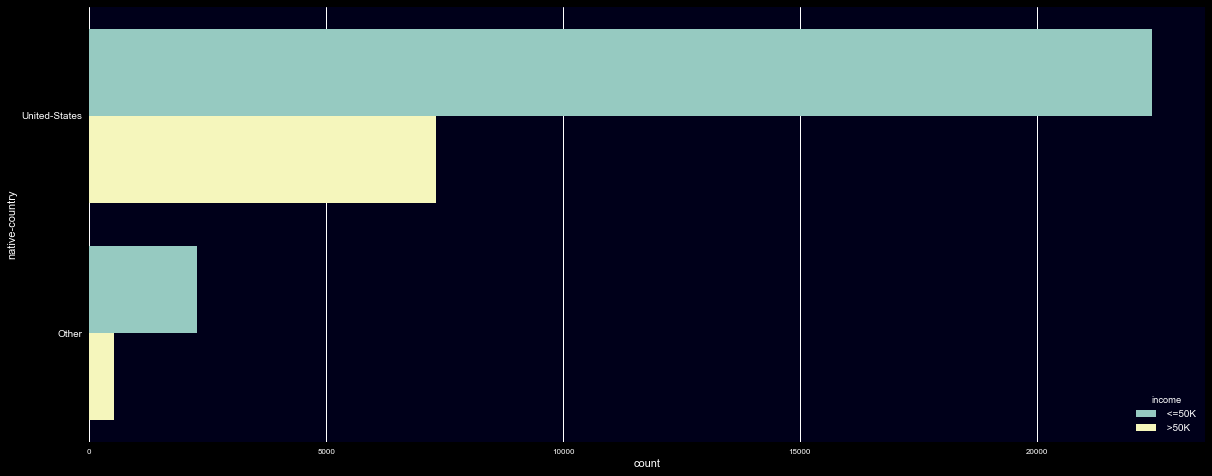

In [58]:
## Now coming back to Country column, only US was dominant one and rest were not , so i will replace the less significant countries
## to Other country value ##
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
ax.set_facecolor((0,0,0.10))
countries = np.array(df['native-country'].unique())
countries = np.delete(countries, 0)
df['native-country'].replace(countries, 'Other', inplace = True)
sns.countplot(y = 'native-country', hue = 'income', data = df)

In [59]:
df['native-country'].unique()

array(['United-States', 'Other'], dtype=object)

In [60]:
df['native-country'].value_counts()

United-States    29753
Other             2808
Name: native-country, dtype: int64

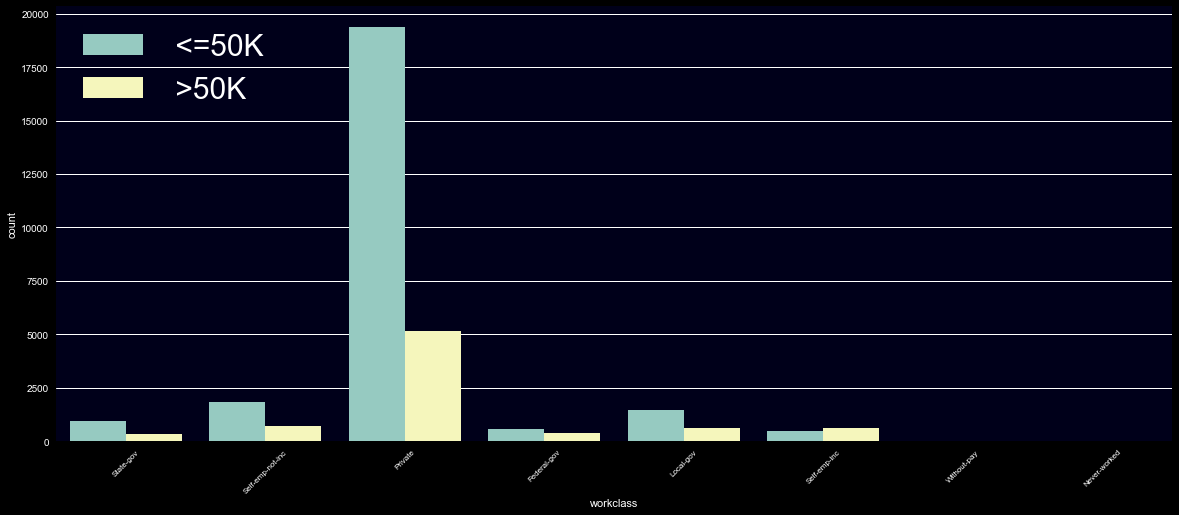

In [61]:
## Exploring Occupation, WorkClass, FinalWeight ##
## WorkClass ##
draw_countplot(countplot_x='workclass', countplot_hue='income', countplot_data=df)

In [62]:
df['workclass'].value_counts()

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [63]:
## Seeing above, two values Without-pay and Never-worked are insignificant & Federal-gov has value which does not contributes that much, these can be either be dropped or combined into a new one called Other ##
df["workclass"] = df["workclass"].apply(lambda x: x.replace("Without-pay", "Other"))
df["workclass"] = df["workclass"].apply(lambda x: x.replace("Never-worked", "Other"))
df["workclass"] = df["workclass"].apply(lambda x: x.replace("Federal-gov", "Other"))

In [64]:
df['workclass'].value_counts()

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Other                 981
Name: workclass, dtype: int64

In [65]:
pd.isnull(df["workclass"]).value_counts()
## There is no missing values ## This column is cleaned now ##

False    32561
Name: workclass, dtype: int64

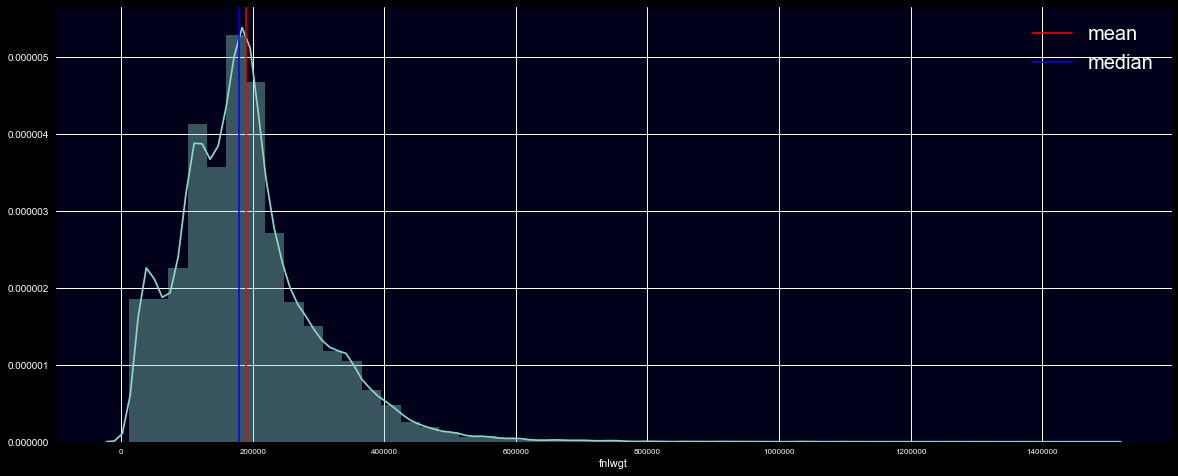

In [66]:
## Exploring fnlwgt - Final Weight ##
draw_distplot(column=df['fnlwgt'])

In [67]:
## Seing the plot and values, it does not add up any significant importance towards prediction, anyway will check through correlation matrix later and then 
## it can be dropped ##
df['fnlwgt'].value_counts()

203488    13
123011    13
164190    13
148995    12
113364    12
          ..
218551     1
201204     1
362999     1
162297     1
145522     1
Name: fnlwgt, Length: 21648, dtype: int64

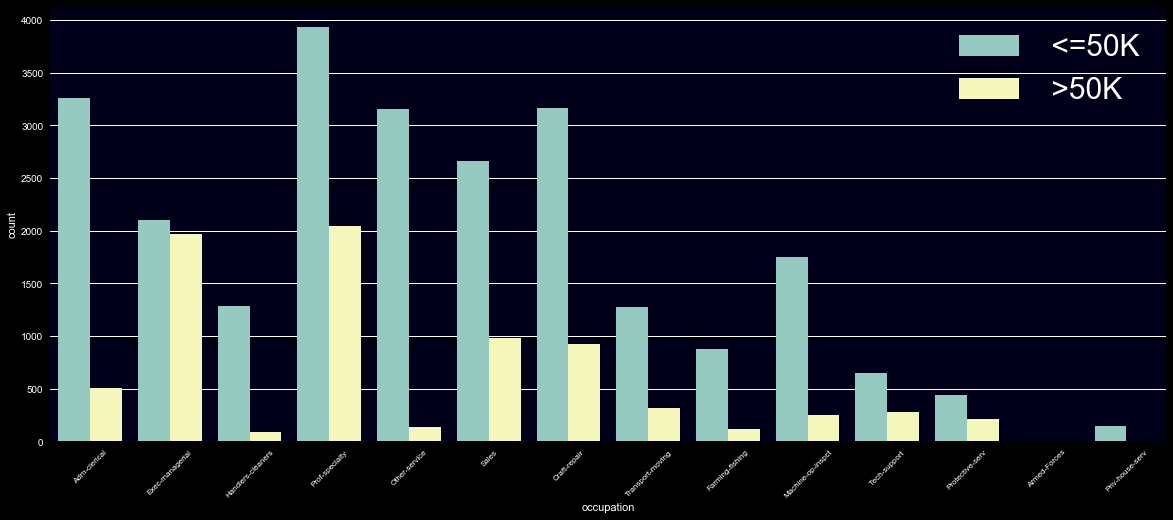

In [68]:
## Exploring Occupation ##
draw_countplot(countplot_x='occupation', countplot_hue='income', countplot_data=df)

In [69]:
df['occupation'].value_counts()

Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [70]:
## Checking missing values ##
pd.isnull(df["occupation"]).value_counts() ## It does not have any missing values ##

False    32561
Name: occupation, dtype: int64

In [71]:
## Checking '?' values ##
df["occupation"].unique() ## It does not have any '?' value as well ##

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

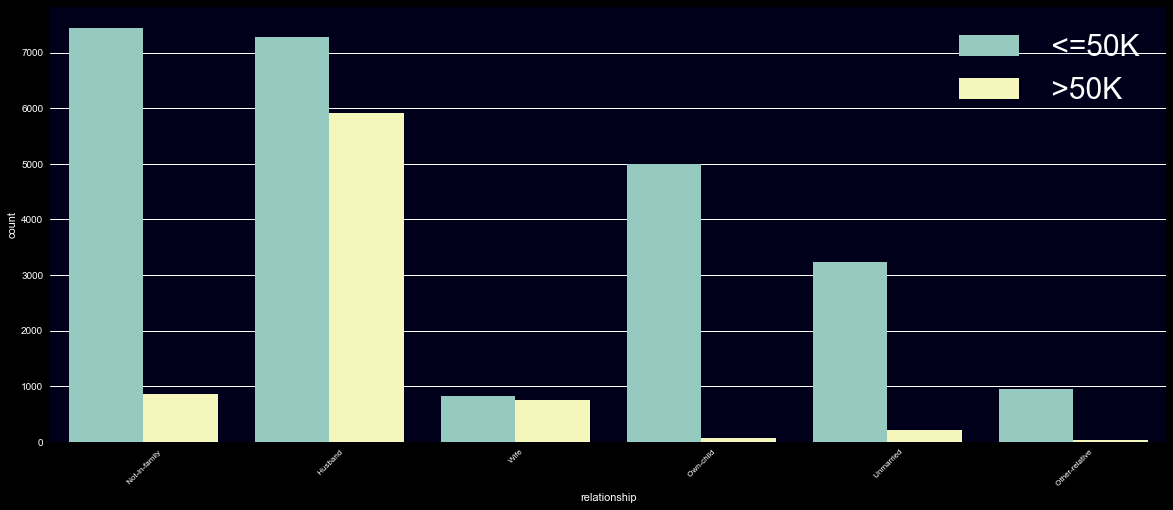

In [72]:
## Exploring Relationship column ##
draw_countplot(countplot_x='relationship', countplot_hue='income', countplot_data=df)

In [73]:
df['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

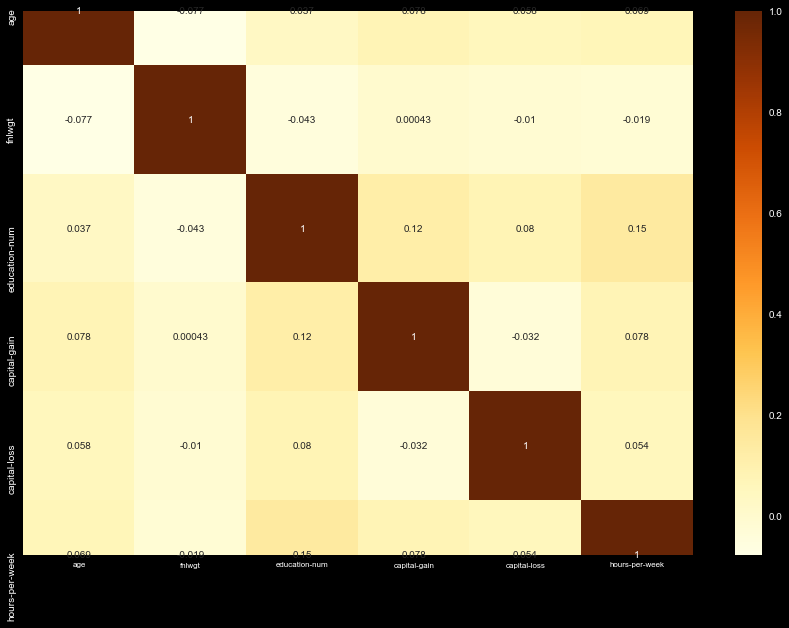

In [74]:
## Multivariate Analysis via Corr Matrix ##
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap = 'YlOrBr')

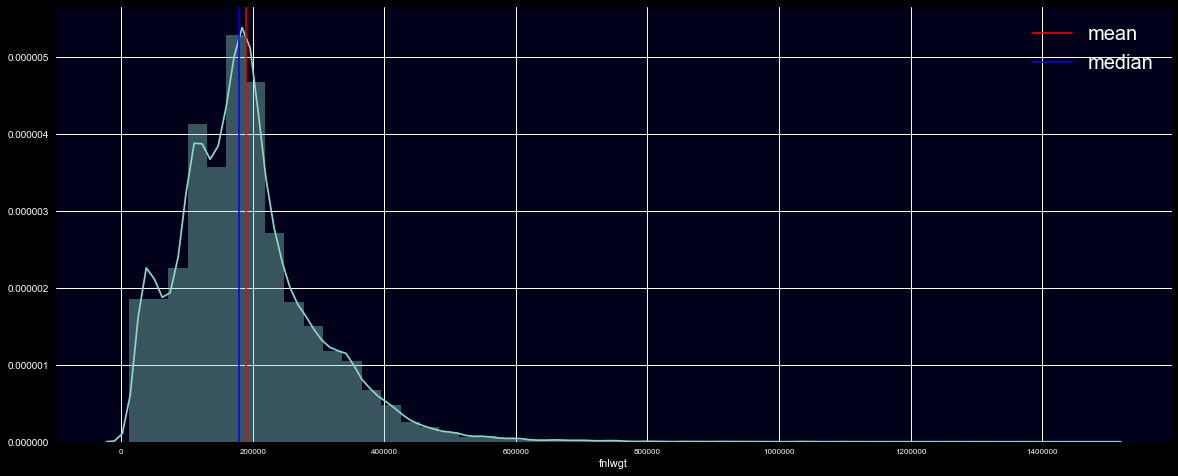

In [75]:
draw_distplot(column=df['fnlwgt'])

In [76]:
df2 = df.copy()

In [77]:
## Seeing above 2 plots, the Final Weight does seems to be adding any significant importance, hence dropping this column #
df = df.drop(['fnlwgt'], axis=1)

In [78]:
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Other,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [79]:
## Education & Education Num represent the similar info , hence dropping the education ##
df.drop(['education'], axis = 1, inplace = True)

In [80]:
df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Other,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [81]:
df3 = df.copy()

## While exploring the dataset, the most number of people are young, white, male, high school graduates with 9 to 10 years of education and work avg 40 hours per week.From the correlation matrix, we can see that the dependent feature 'income' is highly correlated with age, education no of years, capital gain and hours per week ##

In [82]:
df.columns

Index(['age', 'workclass', 'education-num', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [83]:
df.dtypes

age                int64
workclass         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [84]:
## Applying the One Hot encoder to cat columns ##
data_pred_df = pd.get_dummies(df, drop_first=True)

In [85]:
data_pred_df

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Other,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Other,race_ White,sex_ Male,native-country_United-States,income_ >50K
0,39,13,2174,0,40,0,0,0,0,1,...,1,0,0,0,0,0,1,1,1,0
1,50,13,0,0,13,0,0,0,1,0,...,0,0,0,0,0,0,1,1,1,0
2,38,9,0,0,40,0,1,0,0,0,...,1,0,0,0,0,0,1,1,1,0
3,53,7,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,28,13,0,0,40,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,0,0,38,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,0
32557,40,9,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,1
32558,58,9,0,0,40,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
32559,22,9,0,0,20,0,1,0,0,0,...,0,0,1,0,0,0,1,1,1,0


In [86]:
## Checking the Feature importance using Select Transform method based on p-values ##
f = data_pred_df.copy()
X1 = f.iloc[:, :-1]
Y1 = f.iloc[:, -1]

In [87]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, GenericUnivariateSelect, f_regression

In [88]:
SelectorK = SelectKBest(score_func=f_regression, k= 20)
x_k = SelectorK.fit_transform(X1, Y1)

In [89]:
x_k.shape

(32561, 20)

In [90]:
f_Score = SelectorK.scores_
p_values = SelectorK.pvalues_

In [91]:
columns = list(X1.columns)

In [92]:
print(" ")
print(" ")
print(" ")

print("  Features ", "F-Score  ", "P-Values")
print("  --------     ----------   --------")

for i in range(0, len(columns)):
    f1 = "%4.2f" % f_Score[i]
    p1 = "%2.6f" % p_values[i]
    print("  ", columns[i].ljust(12), f1.rjust(8), " ", p1.rjust(12))

 
 
 
  Features  F-Score   P-Values
  --------     ----------   --------
   age           1886.71       0.000000
   education-num  4120.10       0.000000
   capital-gain  1709.15       0.000000
   capital-loss   754.83       0.000000
   hours-per-week  1813.39       0.000000
   workclass_Other   104.74       0.000000
   workclass_Private   521.64       0.000000
   workclass_Self-emp-inc   645.87       0.000000
   workclass_Self-emp-not-inc    29.37       0.000000
   workclass_State-gov     7.18       0.007396
   marital-status_ Married-AF-spouse     4.74       0.029523
   marital-status_ Married-civ-spouse  8025.84       0.000000
   marital-status_ Married-spouse-absent    59.00       0.000000
   marital-status_ Never-married  3674.20       0.000000
   marital-status_ Separated   181.16       0.000000
   marital-status_ Widowed   135.52       0.000000
   occupation_Armed-Forces     0.83       0.362769
   occupation_Craft-repair     5.15       0.023254
   occupation_Exec-managerial  15

In [93]:
cols = SelectorK.get_support(indices= True)
Selected_cols = X1.columns[cols].tolist()

In [94]:
print(Selected_cols)

['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_Private', 'workclass_Self-emp-inc', 'marital-status_ Married-civ-spouse', 'marital-status_ Never-married', 'occupation_Exec-managerial', 'occupation_Handlers-cleaners', 'occupation_Other-service', 'occupation_Prof-specialty', 'relationship_ Not-in-family', 'relationship_ Other-relative', 'relationship_ Own-child', 'relationship_ Unmarried', 'relationship_ Wife', 'race_ White', 'sex_ Male']


In [141]:
## Here are the list of Top Featurs if i need to pass the top most significant features into the model ##

In [95]:
## Now checking the features importance based on correlation ##
def correlation(df, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [96]:
corr_features = correlation(data_pred_df, 0.7)
len(set(corr_features)) 

0

In [144]:
## Custom func states that there are no highly correlated independent variables which is good , its a check
## for multicolinearity as well.##

## Feature scaling ##

In [97]:
f1 = f.copy()

In [98]:
f.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Other,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Other,race_ White,sex_ Male,native-country_United-States,income_ >50K
0,39,13,2174,0,40,0,0,0,0,1,...,1,0,0,0,0,0,1,1,1,0
1,50,13,0,0,13,0,0,0,1,0,...,0,0,0,0,0,0,1,1,1,0
2,38,9,0,0,40,0,1,0,0,0,...,1,0,0,0,0,0,1,1,1,0
3,53,7,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,28,13,0,0,40,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [99]:
f.rename(columns={'income_ >50K' : 'Income Class'}, inplace=True)

In [100]:
f.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Other,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Other,race_ White,sex_ Male,native-country_United-States,Income Class
0,39,13,2174,0,40,0,0,0,0,1,...,1,0,0,0,0,0,1,1,1,0
1,50,13,0,0,13,0,0,0,1,0,...,0,0,0,0,0,0,1,1,1,0
2,38,9,0,0,40,0,1,0,0,0,...,1,0,0,0,0,0,1,1,1,0
3,53,7,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,28,13,0,0,40,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [101]:
f.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Other', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'relationship_ Not-in-family', 'relationship_ Other-relative',
       'relationship_ Own-child', 'relationship_ Unmarried',


In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
f['capital-gain'] = scaler.fit_transform(f[['capital-gain']])
f['capital-loss'] = scaler.fit_transform(f[['capital-loss']])
f['age'] = scaler.fit_transform(f[['age']])
f['education-num'] = scaler.fit_transform(f[['education-num']])
f['hours-per-week'] = scaler.fit_transform(f[['hours-per-week']])

In [103]:
f

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Other,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Other,race_ White,sex_ Male,native-country_United-States,Income Class
0,0.030671,1.134739,0.148453,-0.21666,-0.035429,0,0,0,0,1,...,1,0,0,0,0,0,1,1,1,0
1,0.837109,1.134739,-0.145920,-0.21666,-2.222153,0,0,0,1,0,...,0,0,0,0,0,0,1,1,1,0
2,-0.042642,-0.420060,-0.145920,-0.21666,-0.035429,0,1,0,0,0,...,1,0,0,0,0,0,1,1,1,0
3,1.057047,-1.197459,-0.145920,-0.21666,-0.035429,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,-0.775768,1.134739,-0.145920,-0.21666,-0.035429,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,0.746039,-0.145920,-0.21666,-0.197409,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,0
32557,0.103983,-0.420060,-0.145920,-0.21666,-0.035429,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,1
32558,1.423610,-0.420060,-0.145920,-0.21666,-0.035429,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
32559,-1.215643,-0.420060,-0.145920,-0.21666,-1.655225,0,1,0,0,0,...,0,0,1,0,0,0,1,1,1,0


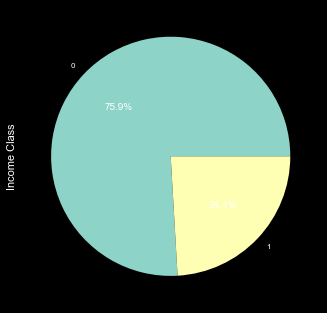

In [104]:
## Fixing the imbalanced dataset ##
f['Income Class'].value_counts().plot.pie(autopct='%1.1f%%')

In [105]:
X= f.iloc[:,:-1]
y = f.iloc[:,-1]

In [106]:
round(y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    75.92 %
1    24.08 %
Name: Income Class, dtype: object

In [107]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [108]:
ros.fit(X, y)

RandomOverSampler(random_state=42)

In [109]:
X_resampled, y_resampled = ros.fit_resample(X, y)

In [110]:
round(y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    50.0 %
1    50.0 %
Name: Income Class, dtype: object

In [ ]:
## Now the target class is balanced and we can continue building Train/Test Split and Model building ##

## Creating Train Test Split ##

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [112]:
X_train.shape, y_train.shape, X_test.shape,  y_test.shape

((39552, 38), (39552,), (9888, 38), (9888,))

## Data Modeling via Logistic Regression ##

In [113]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [114]:
Y_pred_log_reg = log_reg.predict(X_test)

In [115]:
Y_pred_log_reg

array([0, 0, 1, ..., 1, 0, 1], dtype=uint8)

## Model Evaluation - Logistic Regression ##

In [116]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score
log_conf = confusion_matrix(y_test,Y_pred_log_reg)
log_clas_report = classification_report(y_test,Y_pred_log_reg)

In [117]:
print(log_conf)

[[3859 1079]
 [ 733 4217]]


In [118]:
print(log_clas_report)

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      4938
           1       0.80      0.85      0.82      4950

    accuracy                           0.82      9888
   macro avg       0.82      0.82      0.82      9888
weighted avg       0.82      0.82      0.82      9888



In [119]:
from sklearn.metrics import recall_score
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(y_test, Y_pred_log_reg) * 100, 2))
print('F1 score:', round(f1_score(y_test, Y_pred_log_reg) * 100, 2))
print('Precision score:', round(precision_score(y_test, Y_pred_log_reg) * 100, 2))
print('Recall score:', round(recall_score(y_test, Y_pred_log_reg) * 100, 2))

Logistic Regression:
Accuracy score: 81.67
F1 score: 82.32
Precision score: 79.63
Recall score: 85.19


## AUC-ROC for Logistic Regression ##

In [1]:
y_prob = log_reg.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test,y_prob)
AUC_LOG = roc_auc_score(y_test,y_prob)
print(AUC_LOG)

NameError: name 'log_reg' is not defined

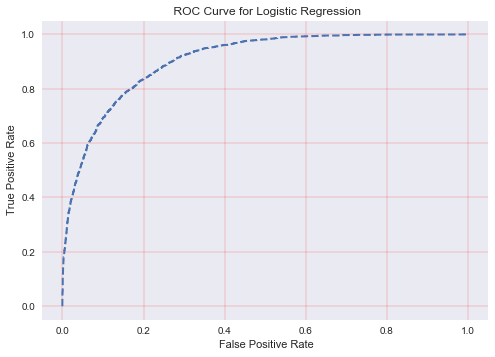

In [121]:
plt.style.use('seaborn')
plt.plot(fpr, tpr, linewidth = 2, linestyle='dashed')
plt.xlabel(' False Positive Rate')
plt.ylabel(' True Positive Rate')
plt.title(' ROC Curve for Logistic Regression')
plt.grid(color='r', linestyle='-', linewidth=0.2)

## KNN Classifier ##

In [122]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
Y_pred_knn = knn.predict(X_test)

In [123]:
Y_pred_knn

array([0, 0, 1, ..., 1, 0, 1], dtype=uint8)

In [124]:
## Model Evaluation - KNN Classifier ##
knn_conf = confusion_matrix(y_test,Y_pred_knn)
knn_clas_report = classification_report(y_test,Y_pred_knn)

In [125]:
print(knn_clas_report)

              precision    recall  f1-score   support

           0       0.89      0.78      0.84      4938
           1       0.81      0.91      0.85      4950

    accuracy                           0.85      9888
   macro avg       0.85      0.85      0.85      9888
weighted avg       0.85      0.85      0.85      9888



In [126]:
print(knn_conf)

[[3868 1070]
 [ 455 4495]]


In [127]:
print('KNN Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, Y_pred_knn) * 100, 2))
print('F1 score:', round(f1_score(y_test, Y_pred_knn) * 100, 2))
print('Precision score:', round(precision_score(y_test, Y_pred_knn) * 100, 2))
print('Recall score:', round(recall_score(y_test, Y_pred_knn) * 100, 2))

KNN Classifier:
Accuracy score: 84.58
F1 score: 85.5
Precision score: 80.77
Recall score: 90.81


In [128]:
## AUC-ROC for KNN Classifier ##
y_prob_knn = knn.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test,y_prob_knn)
AUC_Knn = roc_auc_score(y_test,y_prob_knn)
print(AUC_Knn)

0.9157308606518815


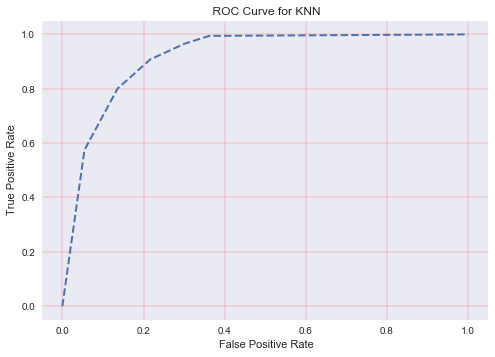

In [129]:
plt.plot(fpr, tpr, linewidth = 2, linestyle='dashed')
plt.xlabel(' False Positive Rate')
plt.ylabel(' True Positive Rate')
plt.title(' ROC Curve for KNN')
plt.grid(color='r', linestyle='-', linewidth=0.2)

## Support Vector Classifier ##

In [130]:
from sklearn.svm import SVC
svc = SVC(random_state=42, probability=True)
svc.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [131]:
Y_pred_svc = svc.predict(X_test)

In [132]:
print(Y_pred_svc)

[0 0 1 ... 1 0 1]


In [133]:
## Model Evaluation - SVC Classifier ##
SVC_conf = confusion_matrix(y_test,Y_pred_svc)
SVC_clas_report = classification_report(y_test,Y_pred_svc)

In [134]:
print(SVC_clas_report)

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      4938
           1       0.80      0.89      0.84      4950

    accuracy                           0.83      9888
   macro avg       0.84      0.83      0.83      9888
weighted avg       0.84      0.83      0.83      9888



In [135]:
print(SVC_conf)

[[3845 1093]
 [ 552 4398]]


In [136]:
print('SVC Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, Y_pred_svc) * 100, 2))
print('F1 score:', round(f1_score(y_test, Y_pred_svc) * 100, 2))
print('Precision score:', round(precision_score(y_test, Y_pred_svc) * 100, 2))
print('Recall score:', round(recall_score(y_test, Y_pred_svc) * 100, 2))

SVC Classifier:
Accuracy score: 83.36
F1 score: 84.24
Precision score: 80.09
Recall score: 88.85


In [137]:
## AUC-ROC for SVC Classifier ##
y_prob_svc = svc.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test,y_prob_svc)
AUC_SVC = roc_auc_score(y_test,y_prob_svc)
print(AUC_SVC)

0.914857955823934


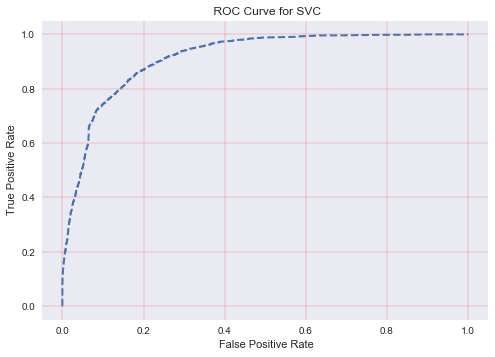

In [138]:
plt.plot(fpr, tpr, linewidth = 2, linestyle='dashed')
plt.xlabel(' False Positive Rate')
plt.ylabel(' True Positive Rate')
plt.title(' ROC Curve for SVC')
plt.grid(color='r', linestyle='-', linewidth=0.2)

## Building Ensemble Tree model like Decision Tree, RandomForest Classifier & XGBoost Classifier ##
## I will be using non-standardized data for these ensemble mode as these model do not require standardized data ##

In [139]:
f1

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Other,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Other,race_ White,sex_ Male,native-country_United-States,income_ >50K
0,39,13,2174,0,40,0,0,0,0,1,...,1,0,0,0,0,0,1,1,1,0
1,50,13,0,0,13,0,0,0,1,0,...,0,0,0,0,0,0,1,1,1,0
2,38,9,0,0,40,0,1,0,0,0,...,1,0,0,0,0,0,1,1,1,0
3,53,7,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,28,13,0,0,40,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,0,0,38,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,0
32557,40,9,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,1
32558,58,9,0,0,40,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
32559,22,9,0,0,20,0,1,0,0,0,...,0,0,1,0,0,0,1,1,1,0


In [140]:
f1.rename(columns={'income_ >50K' : 'Income Class'}, inplace=True)

In [141]:
f2 = f1.copy()

In [142]:
f1.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Other,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Other,race_ White,sex_ Male,native-country_United-States,Income Class
0,39,13,2174,0,40,0,0,0,0,1,...,1,0,0,0,0,0,1,1,1,0
1,50,13,0,0,13,0,0,0,1,0,...,0,0,0,0,0,0,1,1,1,0
2,38,9,0,0,40,0,1,0,0,0,...,1,0,0,0,0,0,1,1,1,0
3,53,7,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,28,13,0,0,40,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [143]:
X2 = f1.iloc[:,:-1]
y2 = f1.iloc[:,-1]

In [144]:
## Before sampling ##
round(y2.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    75.92 %
1    24.08 %
Name: Income Class, dtype: object

In [145]:
from imblearn.over_sampling import RandomOverSampler
ros2 = RandomOverSampler(random_state=42)

In [146]:
ros2.fit(X2, y2)

RandomOverSampler(random_state=42)

In [147]:
X2_resampled, y2_resampled = ros2.fit_resample(X2, y2)

In [148]:
round(y2_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    50.0 %
1    50.0 %
Name: Income Class, dtype: object

In [230]:
## Now the target class is balanced and we can continue building Train/Test Split and Model building ##

## Creating Train Test Split ##

In [149]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_resampled, y2_resampled, test_size=0.2, random_state=42)

In [150]:
X2_train.shape, y2_train.shape, X2_test.shape,  y2_test.shape

((39552, 38), (39552,), (9888, 38), (9888,))

## Data Modeling via Random Forest Classifier ##

In [233]:
Rfc = RandomForestClassifier(random_state=42)
Rfc.fit(X2_train,y2_train)

RandomForestClassifier(random_state=42)

In [234]:
Y_pred_Rfc = Rfc.predict(X2_test)

In [235]:
Y_pred_Rfc

array([0, 0, 0, ..., 1, 1, 1], dtype=uint8)

In [236]:
## Model Evaluation - Random Forest Classifier ##
Rfc_conf = confusion_matrix(y2_test,Y_pred_Rfc)
Rfc_clas_report = classification_report(y2_test,Y_pred_Rfc)

In [237]:
print(Rfc_conf )

[[4287  651]
 [ 204 4746]]


In [238]:
print(Rfc_clas_report )

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      4938
           1       0.88      0.96      0.92      4950

    accuracy                           0.91      9888
   macro avg       0.92      0.91      0.91      9888
weighted avg       0.92      0.91      0.91      9888



In [239]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(y2_test, Y_pred_Rfc) * 100, 2))
print('F1 score:', round(f1_score(y2_test, Y_pred_Rfc) * 100, 2))
print('Precision score:', round(precision_score(y2_test, Y_pred_Rfc) * 100, 2))
print('Recall score:', round(recall_score(y2_test, Y_pred_Rfc) * 100, 2))

Random Forest Classifier:
Accuracy score: 91.35
F1 score: 91.74
Precision score: 87.94
Recall score: 95.88


In [240]:
## AUC-ROC for Random Forest Classifier ##
y2_prob_rfc = Rfc.predict_proba(X2_test)[:,1]
fpr, tpr, threshold = roc_curve(y2_test,y2_prob_rfc)
AUC_RFC = roc_auc_score(y2_test,y2_prob_rfc)
print(AUC_RFC)

0.9695200281470027


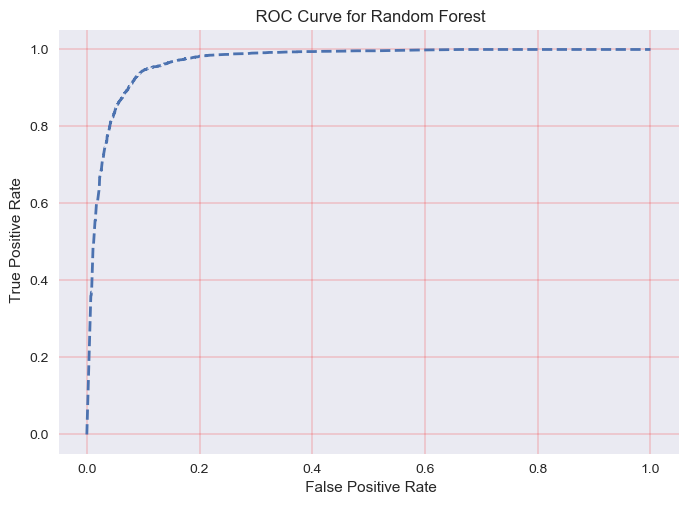

In [241]:
plt.plot(fpr, tpr, linewidth = 2, linestyle='dashed')
plt.xlabel(' False Positive Rate')
plt.ylabel(' True Positive Rate')
plt.title(' ROC Curve for Random Forest')
plt.grid(color='r', linestyle='-', linewidth=0.2)

## XGBoost Classifier ##

In [242]:
from xgboost import XGBClassifier
xg_boost = XGBClassifier()
xg_boost.fit(X2_train, y2_train)

[17:13:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [243]:
Y_pred_xgb = xg_boost.predict(X2_test)

In [244]:
Y_pred_xgb

array([0, 0, 1, ..., 1, 0, 1], dtype=uint8)

In [245]:
## Model Evaluation - XGBoost Classifier ##
XGB_conf = confusion_matrix(y2_test,Y_pred_xgb)
XGB_clas_report = classification_report(y2_test,Y_pred_xgb)

In [246]:
print(XGB_conf)

[[4036  902]
 [ 460 4490]]


In [247]:
print(XGB_clas_report)

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      4938
           1       0.83      0.91      0.87      4950

    accuracy                           0.86      9888
   macro avg       0.87      0.86      0.86      9888
weighted avg       0.87      0.86      0.86      9888



In [248]:
print('XGBoost Classifier:')
print('Accuracy score:', round(accuracy_score(y2_test, Y_pred_xgb) * 100, 2))
print('F1 score:', round(f1_score(y2_test, Y_pred_xgb) * 100, 2))
print('Precision score:', round(precision_score(y2_test, Y_pred_xgb) * 100, 2))
print('Recall score:', round(recall_score(y2_test, Y_pred_xgb) * 100, 2))

XGBoost Classifier:
Accuracy score: 86.23
F1 score: 86.83
Precision score: 83.27
Recall score: 90.71


In [249]:
## AUC-ROC for XGBoost Classifier ##
y2_prob_xgb = xg_boost.predict_proba(X2_test)[:,1]
fpr, tpr, threshold = roc_curve(y2_test,y2_prob_xgb)
AUC_XGB = roc_auc_score(y2_test,y2_prob_xgb)
print(AUC_XGB)

0.9429670336413958


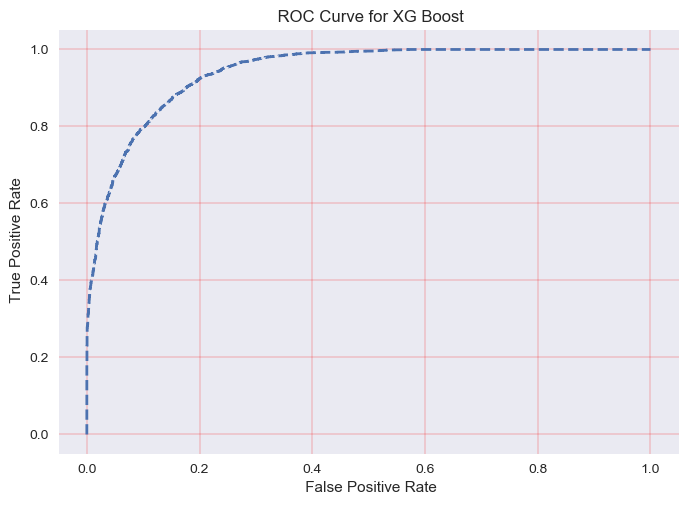

In [250]:
plt.plot(fpr, tpr, linewidth = 2, linestyle='dashed')
plt.xlabel(' False Positive Rate')
plt.ylabel(' True Positive Rate')
plt.title(' ROC Curve for XG Boost')
plt.grid(color='r', linestyle='-', linewidth=0.2)

## Feature Importance XGBoost ##

In [251]:
from xgboost import plot_importance
from matplotlib import pyplot

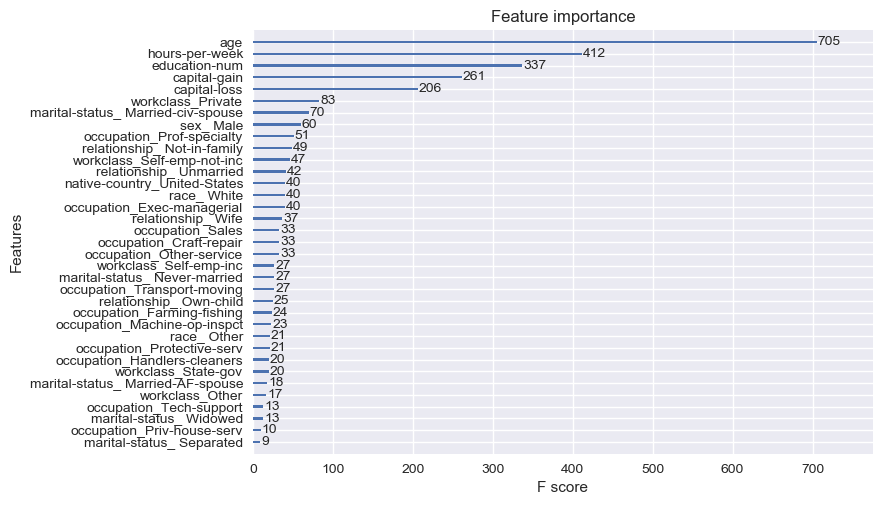

In [253]:
plot_importance(xg_boost, height=0.2, max_num_features=35)
pyplot.show()

## Feature Importance Random Forest Classifier ##

In [254]:
feature_scores = pd.Series(Rfc.feature_importances_, index=X2_train.columns).sort_values(ascending=False)

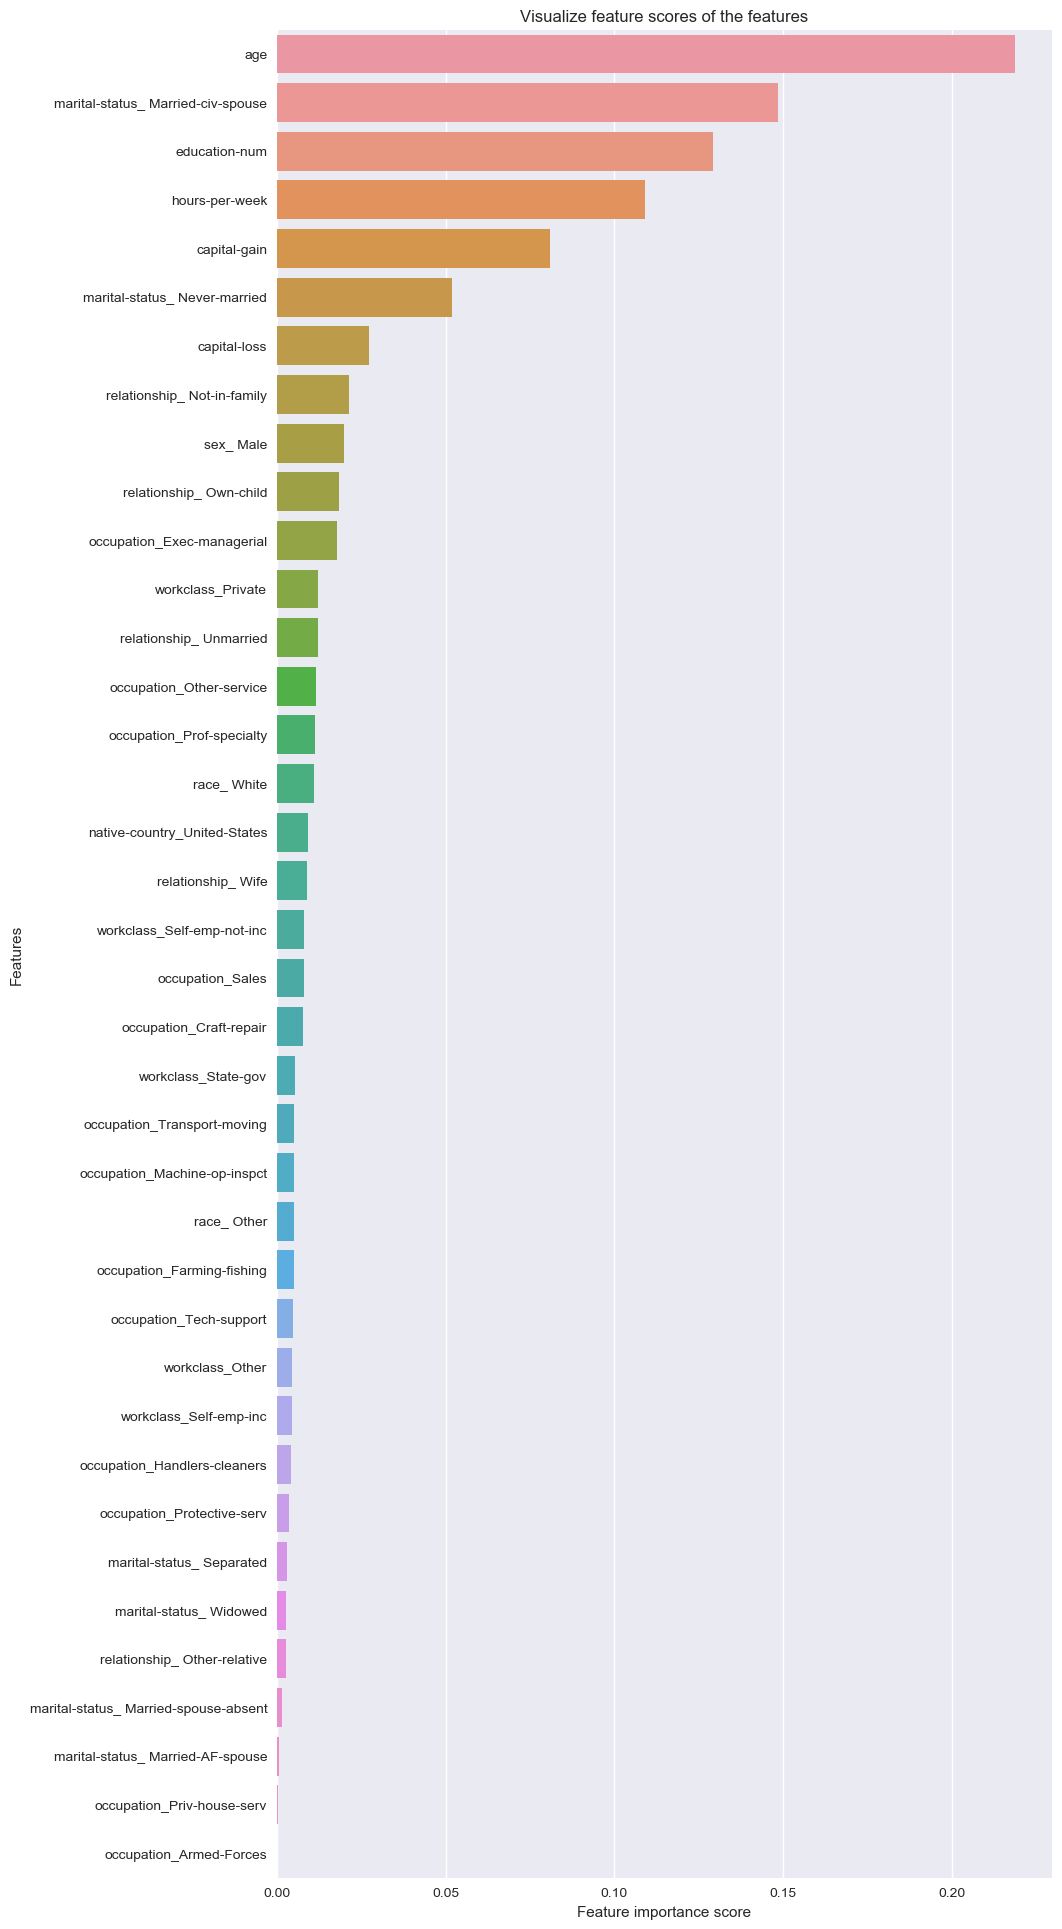

In [258]:
f, ax = plt.subplots(figsize=(10, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

## Decision Tree Classifier ##

In [259]:
d2_tree = DecisionTreeClassifier(random_state=42)
d2_tree.fit(X2_train,y2_train)

DecisionTreeClassifier(random_state=42)

In [260]:
Y_pred_d2_tree = d2_tree.predict(X2_test)

In [261]:
Y_pred_d2_tree

array([0, 0, 0, ..., 1, 1, 1], dtype=uint8)

In [262]:
## Model Evaluation - Decision Tree Classifier ##
D2tree_conf = confusion_matrix(y2_test,Y_pred_d2_tree)
D2tree_clas_report = classification_report(y2_test,Y_pred_d2_tree)

In [263]:
print(D2tree_conf )

[[4179  759]
 [ 240 4710]]


In [264]:
print(D2tree_clas_report )

              precision    recall  f1-score   support

           0       0.95      0.85      0.89      4938
           1       0.86      0.95      0.90      4950

    accuracy                           0.90      9888
   macro avg       0.90      0.90      0.90      9888
weighted avg       0.90      0.90      0.90      9888



In [265]:
print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(y2_test, Y_pred_d2_tree) * 100, 2))
print('F1 score:', round(f1_score(y2_test, Y_pred_d2_tree) * 100, 2))
print('Precision score:', round(precision_score(y2_test, Y_pred_d2_tree) * 100, 2))
print('Recall score:', round(recall_score(y2_test, Y_pred_d2_tree) * 100, 2))

Decision Tree Classifier:
Accuracy score: 89.9
F1 score: 90.41
Precision score: 86.12
Recall score: 95.15


In [266]:
## AUC-ROC for Decision Tree Classifier ##
y_prob_d2tree = d2_tree.predict_proba(X2_test)[:,1]
fpr, tpr, threshold = roc_curve(y2_test,y_prob_d2tree)
AUC_D2tree = roc_auc_score(y2_test,y_prob_d2tree)
print(AUC_D2tree)

0.9179811275983817


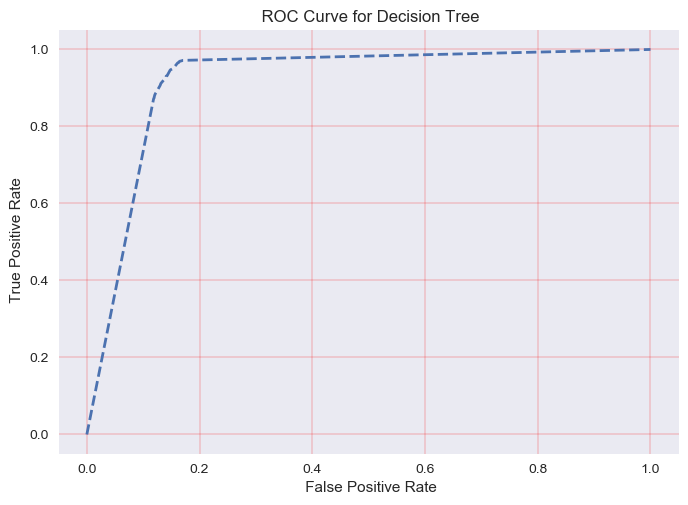

In [267]:
plt.plot(fpr, tpr, linewidth = 2, linestyle='dashed')
plt.xlabel(' False Positive Rate')
plt.ylabel(' True Positive Rate')
plt.title(' ROC Curve for Decision Tree')
plt.grid(color='r', linestyle='-', linewidth=0.2)

## Random Forest is giving the best result based on Accuracy and F1 Score
        AUC: 97
        Accuracy score: 91.35
        F1 score: 91.74
        Precision score: 87.94
        Recall score: 95.88

        [[4287  651]
         [ 204 4746]

## 2nd Best Model is Decision Tree giving below result based on Accuracy and F1 Score
        AUC:92
        Accuracy score: 89.9
        F1 score: 90.41
        Precision score: 86.12
        Recall score: 95.15

        [[4179  759]
        [ 240 4710]]

## Using Hypertuned model for Random Forest to see if some better performance can be squeezed out ##

In [282]:
n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]
min_samples_split = [int(x) for x in np.linspace(1, 20, num=10)]
min_samples_leaf = [int(x) for x in np.linspace(1, 20, num=10)]
ccp_alpha = [int(x) for x in np.linspace(0.1, 0.9, num=5)]

In [285]:
param_dist = {'n_estimators': n_estimators,'max_depth': max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,
             'ccp_alpha': ccp_alpha}

In [286]:
Rfc2_tuned = RandomForestClassifier(random_state=42)

In [288]:
Rfc2_cv = RandomizedSearchCV(estimator=Rfc2_tuned, param_distributions=param_dist, cv=10, random_state=42)

In [289]:
import warnings
warnings.filterwarnings('ignore')
print('Finding out the best params of Random Forest......')
Rfc2_cv.fit(X2_train, y2_train)
print('Done finding the Random Forest Params!!!')

Finding out the best params of Random Forest......
Done finding the Random Forest Params!!!


In [290]:
Rfc2_cv.best_score_

0.8701203120545979

In [291]:
Rfc2_cv.best_params_

{'n_estimators': 150,
 'min_samples_split': 5,
 'min_samples_leaf': 3,
 'max_depth': 110,
 'ccp_alpha': 0}

In [151]:
Rfc_best = RandomForestClassifier(max_depth=110, n_estimators=150, min_samples_split=5,min_samples_leaf=3,random_state=42)

In [152]:
Rfc_best.fit(X2_train, y2_train)

RandomForestClassifier(max_depth=110, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=150, random_state=42)

In [153]:
Y_pred_Rfc_best = Rfc_best.predict(X2_test)

In [154]:
Y_pred_Rfc_best

array([0, 0, 1, ..., 1, 0, 1], dtype=uint8)

In [155]:
## Model Evaluation - Random Forest Tuned Classifier ##
RFC_Best_conf = confusion_matrix(y2_test,Y_pred_Rfc_best)
RFC_Best_clas_report = classification_report(y2_test,Y_pred_Rfc_best)

In [156]:
print(RFC_Best_conf)

[[4119  819]
 [ 428 4522]]


In [158]:
print(RFC_Best_clas_report)

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      4938
           1       0.85      0.91      0.88      4950

    accuracy                           0.87      9888
   macro avg       0.88      0.87      0.87      9888
weighted avg       0.88      0.87      0.87      9888



In [159]:
print('Random Forest Tuned Classifier:')
print('Accuracy score:', round(accuracy_score(y2_test, Y_pred_Rfc_best) * 100, 2))
print('F1 score:', round(f1_score(y2_test, Y_pred_Rfc_best) * 100, 2))
print('Precision score:', round(precision_score(y2_test, Y_pred_Rfc_best) * 100, 2))
print('Recall score:', round(recall_score(y2_test, Y_pred_Rfc_best) * 100, 2))

Random Forest Tuned Classifier:
Accuracy score: 87.39
F1 score: 87.88
Precision score: 84.67
Recall score: 91.35


In [161]:
## AUC-ROC for Random Forest Tuned Classifier ##
y2_prob_RFC_Best = Rfc_best.predict_proba(X2_test)[:,1]
fpr, tpr, threshold = roc_curve(y2_test,y2_prob_RFC_Best)
AUC_RFC_Best = roc_auc_score(y2_test,y2_prob_RFC_Best)
print(AUC_RFC_Best)

0.9476879160171992


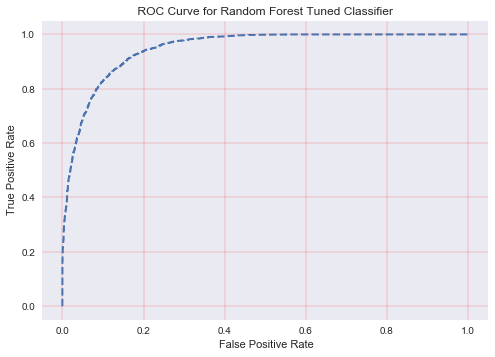

In [163]:
plt.plot(fpr, tpr, linewidth = 2, linestyle='dashed')
plt.xlabel(' False Positive Rate')
plt.ylabel(' True Positive Rate')
plt.title(' ROC Curve for Random Forest Tuned Classifier ')
plt.grid(color='r', linestyle='-', linewidth=0.2)

In [195]:
Output_pred = pd.DataFrame(Y_pred_Rfc_best)

In [197]:
Output_pred = Output_pred.rename(columns={0:'Predicted Income Class'})

In [201]:
Output_pred.head()

,Predicted Income Class
0,0
1,0
2,1
3,0
4,1


In [ ]:
Output_pred.to_excel('C:/Users/maniesh/Desktop/Thomson Reuters Used Case - Adult Income_Manish K Das/Pred_OutputRFTuned.xlsx')

## It seems Hypertuned Random Forest Model isnt giving any improved result. But worthy to check and compare the overfitting between Hypertuned RFC and Normal RFC model  ##

In [342]:
print(AUC_RFC) # Random Forest Model #

0.9695200281470027


In [341]:
print(Rfc_clas_report ) # Random Forest Model #

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      4938
           1       0.88      0.96      0.92      4950

    accuracy                           0.91      9888
   macro avg       0.92      0.91      0.91      9888
weighted avg       0.92      0.91      0.91      9888



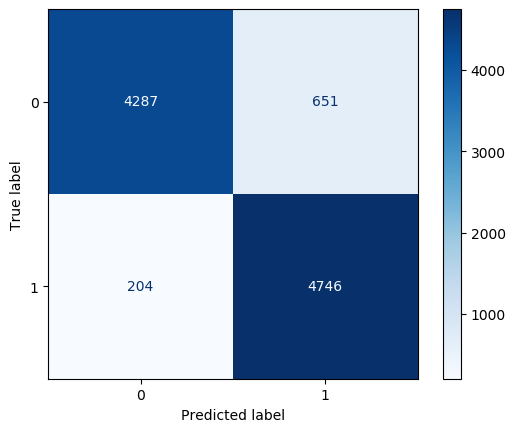

In [340]:
## Confusion Matrix --> Random Forest Model ##
plt.style.use('default')
from sklearn.metrics import plot_confusion_matrix
Rfc_Cnf_Plot = plot_confusion_matrix(Rfc, X2_test, y2_test, cmap='Blues', values_format=None)

## Sample Prediction for Random Forest Classifier ##

In [440]:
## Sample:1 ##

In [398]:
X2_test.iloc[12:13]

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Other,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,occupation_Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Other,race_ White,sex_ Male,native-country_United-States
25222,44,10,7688,0,45,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,1


In [396]:
sample_prediction = Rfc.predict(X2_test.iloc[12:13])
print(f"Current Model Prediction: {sample_prediction}, Actual Value:{y2_test.iloc[12:13]}")

Current Model Prediction: [1], Actual Value:25222    1
Name: Income Class, dtype: uint8


In [ ]:
## Sample:2 ##

In [470]:
X2_test.iloc[1:2]

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Other,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,occupation_Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Other,race_ White,sex_ Male,native-country_United-States
199,24,9,0,0,40,0,0,0,1,0,...,0,1,0,0,0,0,0,1,1,1


In [471]:
sample_prediction = Rfc.predict(X2_test.iloc[1:2])
print(f"Current Model Prediction: {sample_prediction}, Actual Value: {y2_test.iloc[1:2]}")

Current Model Prediction: [0], Actual Value: 199    0
Name: Income Class, dtype: uint8


## Hyper Tuned Model XGBoost ##

In [452]:
from xgboost import XGBClassifier
xgb_best = XGBClassifier()
xgb_param_dist = {'n_estimators':[50,70,100,110],'max_depth':[6,8,10,12,15],'learning_rate':[0.1,0.2,0.3],'gamma':[0.1,0.2,0.3],
            'subsample':[0.9,1.0,2.0],'reg_alpha':[0,0.1,1]}
xgb_param_cv = RandomizedSearchCV(estimator=xgb_best, param_distributions=xgb_param_dist, cv=10, random_state=42)

In [453]:
import warnings
warnings.filterwarnings('ignore')
print('Finding out the best params of XGBoost Hypertuned......')
xgb_param_cv.fit(X2_train, y2_train)
print('Done !!!')

Finding out the best params of XGBoost Hypertuned......
[13:51:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:51:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:51:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:51:07] WAR

In [454]:
xgb_param_cv.best_params_

{'subsample': 0.9,
 'reg_alpha': 0,
 'n_estimators': 50,
 'max_depth': 15,
 'learning_rate': 0.3,
 'gamma': 0.2}

In [455]:
xgb_param_cv.best_score_

0.8992210523086441

In [ ]:
## Fitting the XGBoost Tuned model to check the prediction ##

In [456]:
from xgboost import XGBClassifier
xgb_best_tuned = XGBClassifier(subsample=0.9,n_estimators=50,max_depth=15,learning_rate=0.3,gamma=0.2,random_state=42)
xgb_best_tuned.fit(X2_train, y2_train)

[13:56:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [457]:
Y_pred_xgb_best_tuned = xgb_best_tuned.predict(X2_test)

In [458]:
Y_pred_xgb_best_tuned

array([0, 0, 1, ..., 1, 1, 1], dtype=uint8)

In [459]:
## Model Evaluation - XGBoost Tuned Classifier ##
XGB_Best_Tuned_conf = confusion_matrix(y2_test,Y_pred_xgb_best_tuned)
XGB_Best_Tuned_clas_report = classification_report(y2_test,Y_pred_xgb_best_tuned)

In [460]:
print(XGB_Best_Tuned_conf)

[[4208  730]
 [ 245 4705]]


In [461]:
print(XGB_Best_Tuned_clas_report)

              precision    recall  f1-score   support

           0       0.94      0.85      0.90      4938
           1       0.87      0.95      0.91      4950

    accuracy                           0.90      9888
   macro avg       0.91      0.90      0.90      9888
weighted avg       0.91      0.90      0.90      9888



In [462]:
print('XGBoost Tuned Classifier:')
print('Accuracy score:', round(accuracy_score(y2_test, Y_pred_xgb_best_tuned) * 100, 2))
print('F1 score:', round(f1_score(y2_test, Y_pred_xgb_best_tuned) * 100, 2))
print('Precision score:', round(precision_score(y2_test, Y_pred_xgb_best_tuned) * 100, 2))
print('Recall score:', round(recall_score(y2_test, Y_pred_xgb_best_tuned) * 100, 2))

XGBoost Tuned Classifier:
Accuracy score: 90.14
F1 score: 90.61
Precision score: 86.57
Recall score: 95.05


In [464]:
## AUC-ROC for XGBoost Tuned Classifier ##
y2_prob_XGB_Tuned_Best = xgb_best_tuned.predict_proba(X2_test)[:,1]
fpr, tpr, threshold = roc_curve(y2_test,y2_prob_XGB_Tuned_Best)
AUC_XGB_Tuned_Best = roc_auc_score(y2_test,y2_prob_XGB_Tuned_Best)
print(AUC_XGB_Tuned_Best)

0.9617717065347683


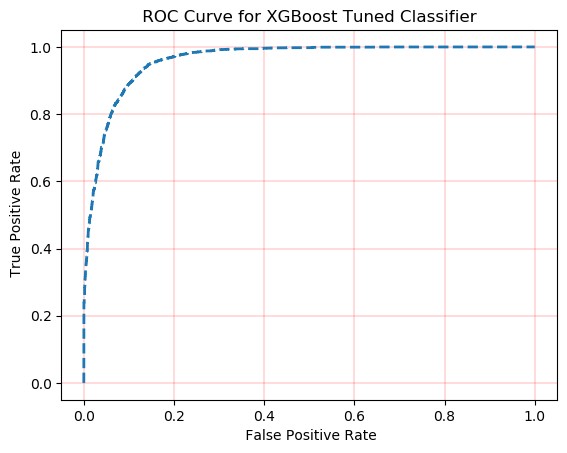

In [465]:
plt.plot(fpr, tpr, linewidth = 2, linestyle='dashed')
plt.xlabel(' False Positive Rate')
plt.ylabel(' True Positive Rate')
plt.title(' ROC Curve for XGBoost Tuned Classifier ')
plt.grid(color='r', linestyle='-', linewidth=0.2)

## Fitting the folds via Cross Validated method for Hyper Tuned XGBoost Classifier Model.

In [466]:
print(' Creating cross validate jobs for 10 folds for the provided estimators.....')
cv_results_XGB_Tuned_Best = cross_validate(xgb_best_tuned, X3, Y3, cv=10, return_train_score=True)

 Creating cross validate jobs for 10 folds for the provided estimators.....
[14:04:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:05:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:05:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old beha

In [467]:
## Calculating Average Train Scores ##
XGB_Tuned_best_train_average = np.average(cv_results_XGB_Tuned_Best['train_score'])

In [468]:
## Calculating Average Test Scores ##
XGB_Tuned_best_test_average = np.average(cv_results_XGB_Tuned_Best['test_score'])

In [469]:
print()
print()
print('        ','Hyper-Tuned XGBoost   ' )
print('        ','---------------' )

print('Test  : ',
      round(XGB_Tuned_best_test_average, 4))

print('Train : ',
      round(XGB_Tuned_best_train_average, 4))



         Hyper-Tuned XGBoost   
         ---------------
Test  :  0.8612
Train :  0.9412


In [ ]:
## Above shows even though XGBoost is giving good score on Accuracy & F1 Score but since the difference between average Train/Test
## Score is more, there is a chance of Overfitting , hence it can be selected as the best model ##

## Checking the possibility of Overfitting using Cross Validated Method for D-Tree, Random Forest, XGBoost & Hypertuned Random Forest ##

In [404]:
f1.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Other,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Other,race_ White,sex_ Male,native-country_United-States,Income Class
0,39,13,2174,0,40,0,0,0,0,1,...,1,0,0,0,0,0,1,1,1,0
1,50,13,0,0,13,0,0,0,1,0,...,0,0,0,0,0,0,1,1,1,0
2,38,9,0,0,40,0,1,0,0,0,...,1,0,0,0,0,0,1,1,1,0
3,53,7,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,28,13,0,0,40,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [407]:
X3 = f1.iloc[:, :-1]
Y3 = f1.iloc[:, -1]

In [410]:
# Import Cross Validate #
from sklearn.model_selection import cross_validate

In [413]:
## We already have the below estimators for Logistic, KNN, D-Tree, RFC, XGBoost intialized , so will use that ##
print(' Creating cross validate jobs for 10 folds for the provided estimators.....')
cv_results_dtc = cross_validate(d2_tree, X3, Y3, cv=10, return_train_score=True)
cv_results_rfc = cross_validate(Rfc, X3, Y3, cv=10, return_train_score=True)
cv_results_xgb = cross_validate(xg_boost, X3, Y3, cv=10, return_train_score=True)
cv_results_log = cross_validate(log_reg, X3, Y3, cv=10, return_train_score=True)
cv_results_knn = cross_validate(knn, X3, Y3, cv=10, return_train_score=True)
print('Done!!!!!')

 Creating cross validate jobs for 10 folds for the provided estimators.....
[23:31:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:31:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:31:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old beha

In [414]:
## Calculating Average Train Scores ##
dtc_train_average = np.average(cv_results_dtc['train_score'])
rfc_train_average = np.average(cv_results_rfc['train_score'])
xgb_train_average = np.average(cv_results_xgb['train_score'])
log_train_average = np.average(cv_results_log['train_score'])
knn_train_average = np.average(cv_results_knn['train_score'])

In [415]:
## Calculating Average Test Scores ##
dtc_test_average = np.average(cv_results_dtc['test_score'])
rfc_test_average = np.average(cv_results_rfc['test_score'])
xgb_test_average = np.average(cv_results_xgb['test_score'])
log_test_average = np.average(cv_results_log['test_score'])
knn_test_average = np.average(cv_results_knn['test_score'])

In [416]:
## Overfitting check by checking difference between avg Train/Test score.
## Lesser the distance between them , less chance of overfitting.
# print the results 
print()
print()
print('        ','Decision Tree  ', 'Random Forest  ','     XGBoost   ')
print('        ','---------------', '---------------','-----------------')

print('Test  : ',
      round(dtc_test_average, 4), '        ',
      round(rfc_test_average, 4), '        ',
      round(xgb_test_average, 4))

print('Train : ',
      round(dtc_train_average, 4), '        ',
      round(rfc_train_average, 4), '        ',
      round(xgb_train_average, 4))




         Decision Tree   Random Forest        XGBoost   
         --------------- --------------- -----------------
Test  :  0.8196          0.8496          0.8721
Train :  0.9767          0.9766          0.8937


In [425]:
0.9766 - 0.8496 # RFC train/test avg difference score is high, likely to overfit the model.

0.127

In [ ]:
## The idea of checking the overfitting is to calculate the average train/test score and see how much is the difference between them.
## If the difference is very less --> Less chance of overfitting
## If the difference is more --> Likely to happen that Model will overfit.
## Much difference between average train/test score means that there is much chance that variance will be inflated resulting high errors.

## RFC --> There is a chance of overfitting  with Random Forest classifier although Accuracy and F1 Score is high as difference between average
## Train/Test score is high.
## D-tree --> There is a chance of overfitting  with Random Forest classifier although Accuracy and F1 Score is high as difference between average
## Train/Test score is high.
## Hyper Tuned RFC Model --> The average train/test score difference is not that much, there is less chance of overfitting and its Accuracy Score, F1 Score is also good.
## XGBoost --> Though XGBoost average train/test score difference is less but Its Accuracy & F1 Score is less compared to Hypertuned RFC Model.


## Fitting the folds via Cross Validated method for Hyper Tuned Random Forest Classifier Model.

In [431]:
print(' Creating cross validate jobs for 10 folds for the provided estimators.....')
cv_results_RFC_Best = cross_validate(Rfc_best, X3, Y3, cv=10, return_train_score=True)

 Creating cross validate jobs for 10 folds for the provided estimators.....


In [432]:
## Calculating Average Train Scores ##
rfc_best_train_average = np.average(cv_results_RFC_Best['train_score'])

In [433]:
## Calculating Average Test Scores ##
rfc_best_test_average = np.average(cv_results_RFC_Best['test_score'])

In [434]:
print()
print()
print('        ','Hyper-Tuned Random Forest  ' )
print('        ','---------------' )

print('Test  : ',
      round(rfc_best_test_average, 4))

print('Train : ',
      round(rfc_best_train_average, 4))




         Hyper-Tuned Random Forest  
         ---------------
Test  :  0.866
Train :  0.893


In [421]:
0.893 - 0.866 ## The avg difference between Train/Test is less , hence less chance of overfitting.

0.027000000000000024

## Model Selection ##

# Based on less overfitting, good accuracy, good F1 Score , AUC Score, Hypertuned Random Classifier Model is appropriate choice. 2nd good and appropriate model is XGBoost Hypertuned Model.

In [435]:
## Hyper Tuned Random Forest Classifier Model evaluation results ##
print(RFC_Best_conf)

[[4119  819]
 [ 428 4522]]


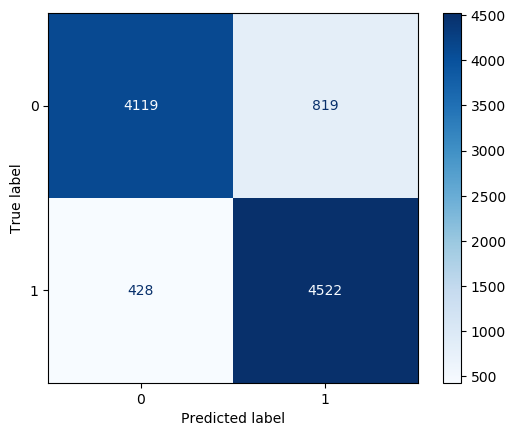

In [436]:
## Confusion Matrix --> Random Forest Model ##
plt.style.use('default')
from sklearn.metrics import plot_confusion_matrix
Rfc_Best_Cnf_Plot = plot_confusion_matrix(Rfc_best, X2_test, y2_test, cmap='Blues', values_format=None)

In [437]:
print(RFC_Best_clas_report)

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      4938
           1       0.85      0.91      0.88      4950

    accuracy                           0.87      9888
   macro avg       0.88      0.87      0.87      9888
weighted avg       0.88      0.87      0.87      9888



In [438]:
print(AUC_RFC_Best)

0.9476879160171992


In [439]:
print('Random Forest Tuned Classifier:')
print('Accuracy score:', round(accuracy_score(y2_test, Y_pred_Rfc_best) * 100, 2))
print('F1 score:', round(f1_score(y2_test, Y_pred_Rfc_best) * 100, 2))
print('Precision score:', round(precision_score(y2_test, Y_pred_Rfc_best) * 100, 2))
print('Recall score:', round(recall_score(y2_test, Y_pred_Rfc_best) * 100, 2))

Random Forest Tuned Classifier:
Accuracy score: 87.39
F1 score: 87.88
Precision score: 84.67
Recall score: 91.35


## Sample Prediction for Hyper Tuned Random Forest Classifier ##

In [441]:
## Sample:1 ##

In [442]:
X2_test.iloc[12:13]

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Other,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,occupation_Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Other,race_ White,sex_ Male,native-country_United-States
25222,44,10,7688,0,45,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,1


In [444]:
sample_prediction1 = Rfc_best.predict(X2_test.iloc[12:13])

In [445]:
print(f"Current Model Prediction: {sample_prediction1}, Actual Value:{y2_test.iloc[12:13]}")

Current Model Prediction: [1], Actual Value:25222    1
Name: Income Class, dtype: uint8


In [446]:
## Sample:2 ##

In [447]:
X2_test.iloc[1:2]

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Other,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,occupation_Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Other,race_ White,sex_ Male,native-country_United-States
199,24,9,0,0,40,0,0,0,1,0,...,0,1,0,0,0,0,0,1,1,1


In [448]:
sample_prediction2 = Rfc_best.predict(X2_test.iloc[1:2])

In [449]:
print(f"Current Model Prediction: {sample_prediction2}, Actual Value: {y2_test.iloc[1:2]}")

Current Model Prediction: [0], Actual Value: 199    0
Name: Income Class, dtype: uint8


In [450]:
print(f"Current Model Prediction: {sample_prediction2}, Actual Value: {y2_test.iloc[1:2]}")

Current Model Prediction: [0], Actual Value: 199    0
Name: Income Class, dtype: uint8


## Feature Importance Hyper Tuned Random Forest Classifier ##

In [492]:
feature_scores_Tuned_RFC = pd.Series(Rfc_best.feature_importances_, index=X2_train.columns).sort_values(ascending=False)

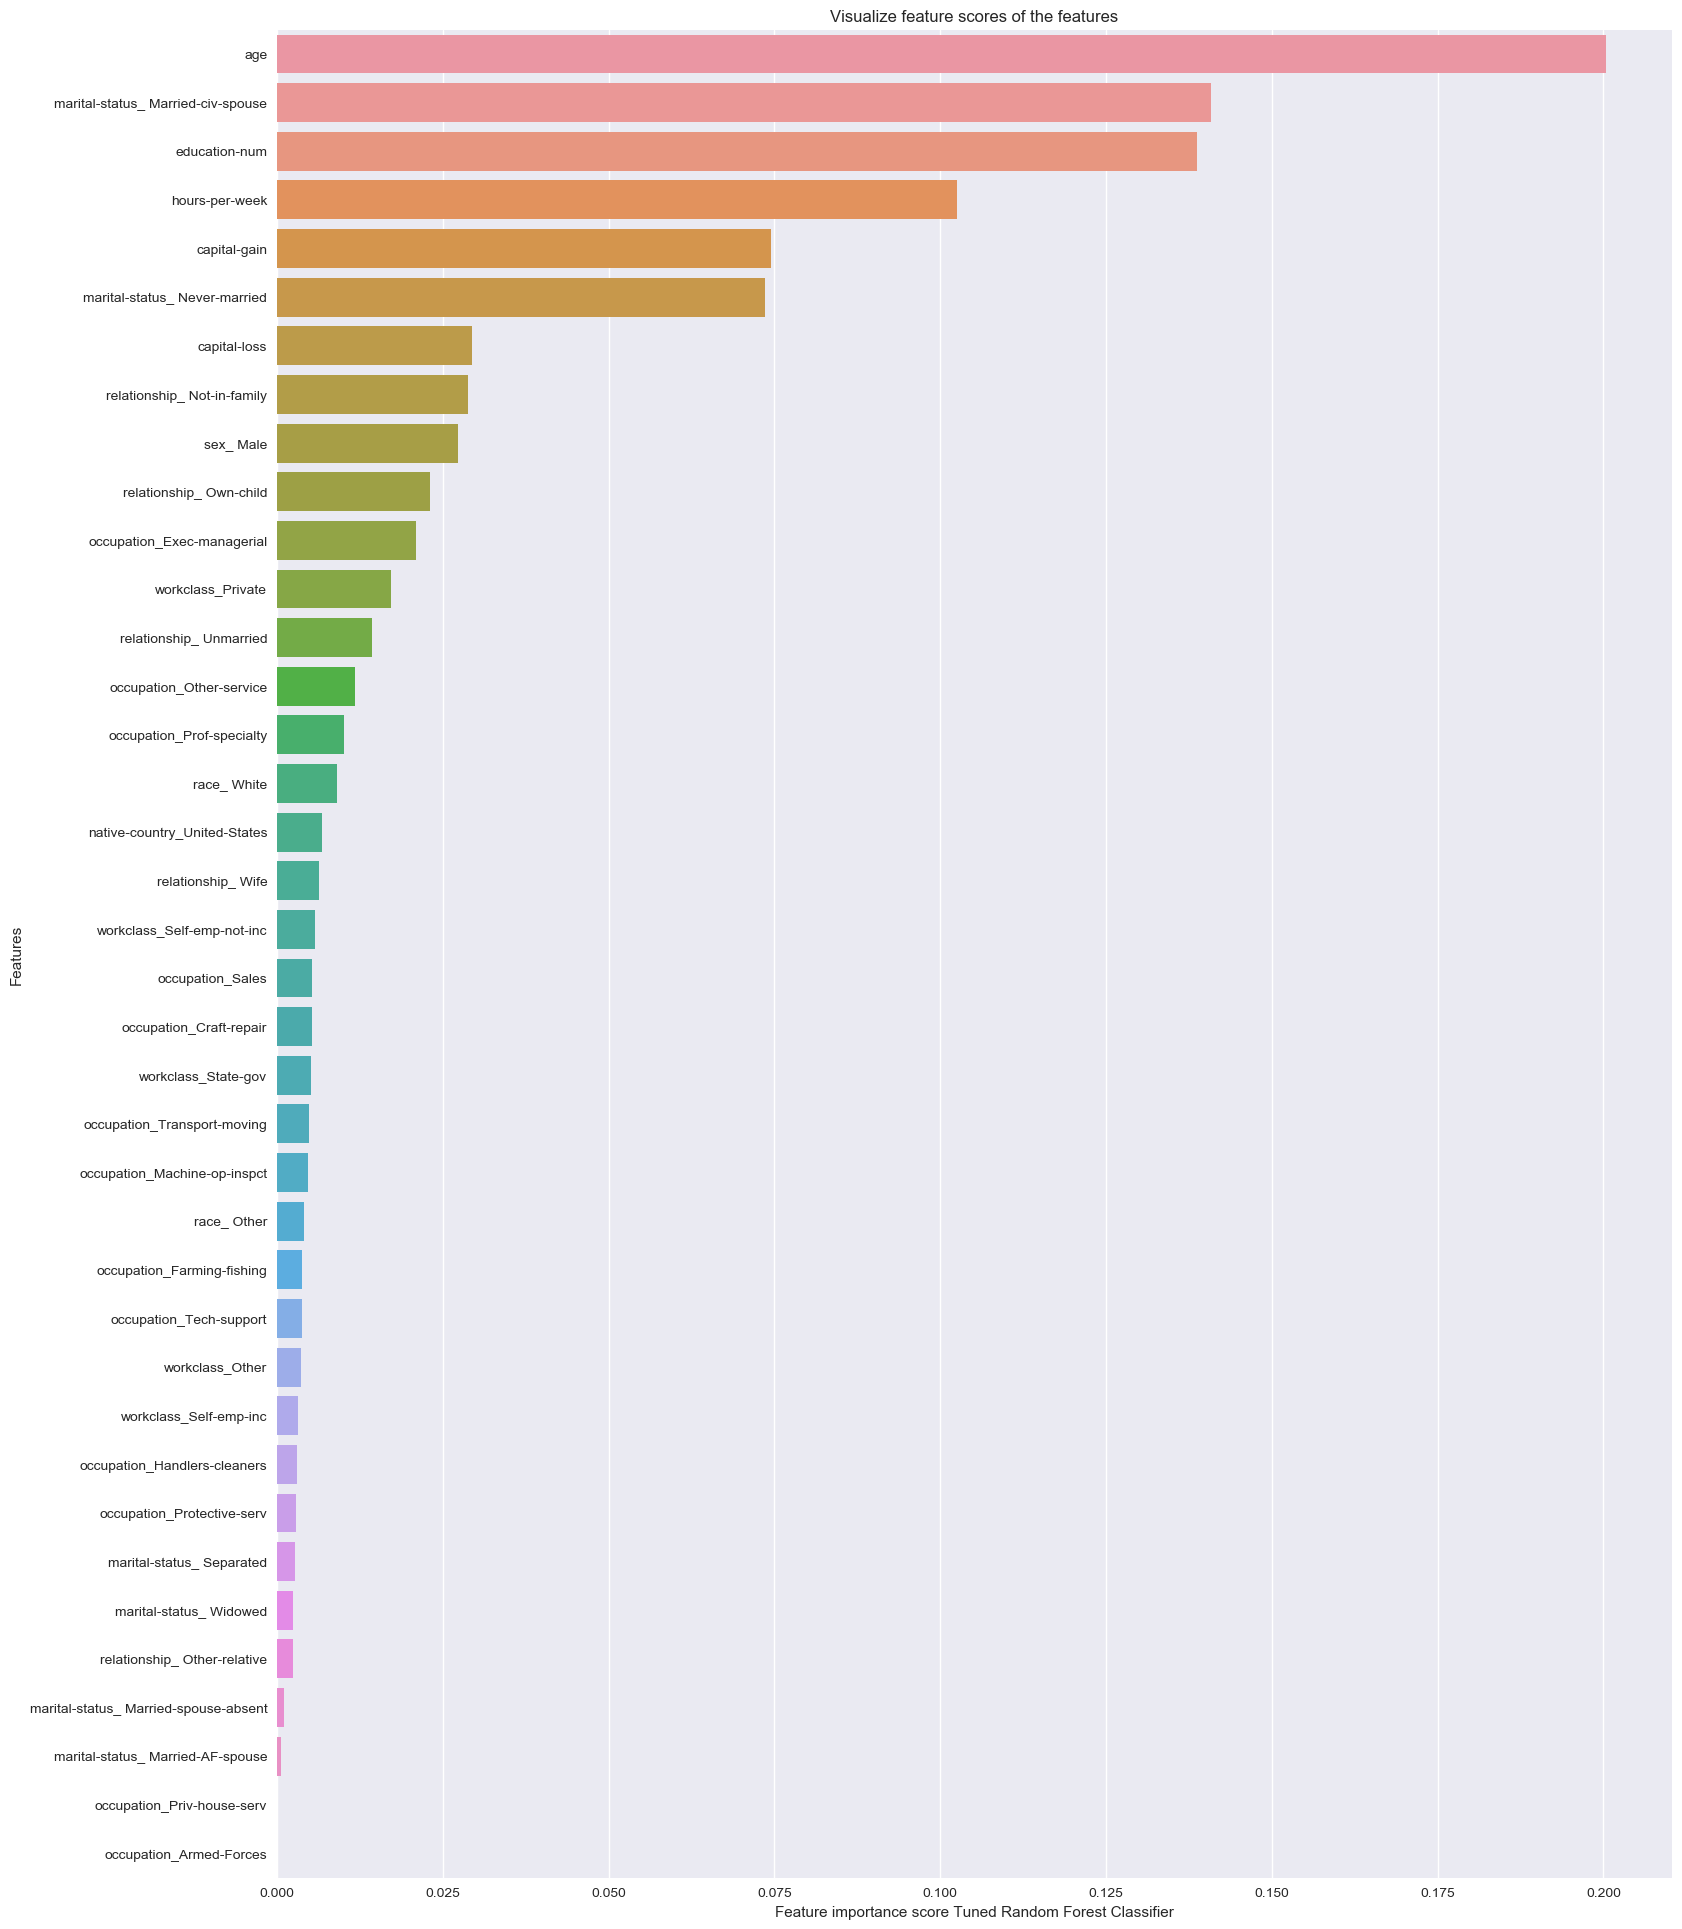

In [499]:
plt.style.use('seaborn')
f, ax = plt.subplots(figsize=(18, 24))
ax = sns.barplot(x=feature_scores_Tuned_RFC, y=feature_scores_Tuned_RFC.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score Tuned Random Forest Classifier")
ax.set_ylabel("Features")
plt.show()

In [ ]:
''' 
Based on less overfitting, good accuracy, good F1 Score , AUC Score, Hypertuned Random Classifier Model is appropriate choice. 
2nd good and appropriate model is XGBoost Hypertuned Model

'''